# (1) Python 基本運算

In [3]:
#Python
a = 1
b = 1
c = a+b
print( "a = ", a)
print( "b = ", b)
print( "c = ", c)

a =  1
b =  1
c =  2


# (2) Tensorflow 基本運算
### Tensorflow 基本運算(常數)

In [1]:
#Tensorflow 
# 演示如何設置 常數 作 Tensorflow 運算
# https://www.tensorflow.org/api_docs/python/tf?hl=zh-tw
#---------------------------------------------------------------------------------------------------------------
import tensorflow as tf

# Data Flow Graphs
#---------------------------------------------------------------------------------------------------------------
#常數
a = tf.constant(1,name='a')
b = tf.constant(2,name='b')
c = tf.constant(3,name='c')
d = tf.constant(4,name='d')

#運算式
add_1 = tf.add(a,b)
add_2 = tf.add(c,d)
mul_1 = tf.multiply(b,c)
output = tf.add(add_1,mul_1)

# Running Graphs ( 靜置圖 ) 
# 可提供靜態圖 ( Graph ) / 動態圖 / 估算器架構 / Keras / Switft (IOS)
#---------------------------------------------------------------------------------------------------------------
with tf.Session() as sess:
    print("a + b = ",sess.run(add_1))
    print("c + d = ",sess.run(add_2))
    print("b * c = ",sess.run(mul_1))
    print("a + b + (b*c) = ",sess.run(output))
    
#Record on TensorBoard
#---------------------------------------------------------------------------------------------------------------
# >>  cd Python\log\area
# >>  activate tensorflow
# >>  tensorboard --logdir=D:\Python\log\area
# >.  link to http://localhost:6006/
tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/area',sess.graph)

a + b =  3
c + d =  7
b * c =  6
a + b + (b*c) =  9


### Tensorflow 基本運算(變數)

In [3]:
#Tensorflow 
# 演示如何設置 變數 作 Tensorflow 運算
# https://www.tensorflow.org/api_docs/python/tf?hl=zh-tw
#---------------------------------------------------------------------------------------------------------------
import tensorflow as tf

#Varialbe 
Vc = tf.constant(1,name='Vc')
Vx = tf.Variable(Vc+5,name='Vx')
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print("Vc = ",sess.run(Vc))
    print("Vx = ",sess.run(Vx))

#Varibale -  settting on running
width = tf.placeholder("int32")
height= tf.placeholder("int32")
area  = tf.multiply(width,height)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print("area  = ",sess.run(area, feed_dict={width:6, height:10}))

#Record on TensorBoard
#---------------------------------------------------------------------------------------------------------------
# >>  cd Python\log\area
# >>  activate tensorflow
# >>  tensorboard --logdir=D:\Python\log\area
# >.  link to http://localhost:6006/
tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/area',sess.graph)

Vc =  1
Vx =  6
area  =  60


### Tensorflow 基本運算(矩陣)

In [31]:
#Tensorflow 
# 演示如何設置 矩陣 作 Tensorflow  
#                              |  -0.5 -0.2 |
# Y = X*W + b = [1.0 1.0 1.0] *|  -0.3  0.4 | + [0.1 0.2] = [-1.2 0.6]
#                              |  -0.5  0.2 |
# https://www.tensorflow.org/api_docs/python/tf?hl=zh-tw
#---------------------------------------------------------------------------------------------------------------
import tensorflow as tf
X = tf.Variable([[1.0,1.0,1.0]])
W = tf.Variable([[-0.5,-0.2],[-0.3,0.4],[-0.5,0.2]])
b = tf.Variable([[0.1,0.2]])
Y = tf.matmul(X,W)+b
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print("Y  = ",sess.run(Y))


Y  =  [[-1.1999999  0.6      ]]


### Tensorflow 激勵函數

In [24]:
#Tensorflow 
# 演示 神經網路中的激勵函數 (activate function)  - 固定變數
#                              |  -0.5 -0.2 |
# Y = X*W + b = [1.0 1.0 1.0] *|  -0.3  0.4 | + [0.1 0.2] = [-1.2 0.6]
#                              |  -0.5  0.2 |
# https://www.tensorflow.org/api_docs/python/tf?hl=zh-tw
#---------------------------------------------------------------------------------------------------------------
import tensorflow as tf
X = tf.Variable([[1.0,1.0,1.0]])  
W = tf.Variable([[-0.5,-0.2],[-0.3,0.4],[-0.5,0.2]])
b = tf.Variable([[0.1,0.2]])
XWB = tf.matmul(X,W)+b #activate function
y = tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print("固定變數範例")
    print("XWB  = ",sess.run(XWB))
    print("y  = ",sess.run(y))
    print("\n")
       
#可將激勵函數換成 sigmoid / tanh / Leaky ReLU / Relu
#link to https://kknews.cc/zh-tw/tech/4jxlbrq.html


#Tensorflow 
# 演示 神經網路中的激勵函數 (activate function)  - 隨機變數
#                              |  -0.5 -0.2 |
# Y = X*W + b = [1.0 1.0 1.0] *|  -0.3  0.4 | + [0.1 0.2] = [-1.2 0.6]
#                              |  -0.5  0.2 |
# https://www.tensorflow.org/api_docs/python/tf?hl=zh-tw
#---------------------------------------------------------------------------------------------------------------
import tensorflow as tf
import numpy as np 
X = tf.placeholder("float",[None,3])
W = tf.Variable(tf.random_normal([3,2]))
b = tf.Variable(tf.random_normal([1,2]))
y = tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2,0.4]])
    (_b,_W,_X,_y) = sess.run((b,W,X,y),feed_dict={X:X_array})
    print("隨機變數範例")
    print("_b =\n  ",_b)
    print("_W =\n  ",_W)
    print("_X =\n  ",_X)
    print("_y =\n  ",_y)

固定變數範例
XWB  =  [[-1.1999999  0.6      ]]
y  =  [[0.  0.6]]


隨機變數範例
_b =
   [[-0.5670088 -0.5998715]]
_W =
   [[-1.1216017  -0.18775994]
 [ 0.82180244 -1.3242587 ]
 [-1.018528    0.44419408]]
_X =
   [[0.4 0.2 0.4]]
_y =
   [[0. 0.]]


### Tensorflow 神經網路(神經元) 

In [23]:
#Tensorflow 
# 建立 神經網路的 layer 
# https://www.tensorflow.org/api_docs/python/tf?hl=zh-tw
#---------------------------------------------------------------------------------------------------------------
import tensorflow as tf
import numpy as np 
#復課書上的圖 page 255
def layer(output_dim,input_dim,inputs,activation=None):
    W = tf.Variable(tf.random_normal([input_dim,output_dim]))
    b = tf.Variable(tf.random_normal([1,output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs =XWb
    else:
        outputs = activation(XWb)
    return outputs,W,b

# 建立 3 layer  神經網路
X = tf.placeholder("float",[None,4])
h,W1,b1 = layer(output_dim=3 ,input_dim=4 ,inputs=X ,activation=tf.nn.relu)
y,W2,b2 = layer(output_dim=2 ,input_dim=3 ,inputs=h ,activation=None)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2,0.4,0.5]])
    (layer_X, layer_h, layer_y, W1, b1, W2, b2)= sess.run((X,h,y,W1,b1,W2,b2),feed_dict={X:X_array})
    print("layer_X =\n  ",layer_X)
    print("layer_h =\n  ",layer_h)
    print("layer_y =\n  ",layer_y)
    print("W1 =\n  ",W1)
    print("b1 =\n  ",b1)
    print("W2 =\n  ",W2)
    print("b2 =\n  ",b2)

layer_X =
   [[0.4 0.2 0.4 0.5]]
layer_h =
   [[0. 0. 0.]]
layer_y =
   [[0.56316096 0.80577797]]
W1 =
   [[ 1.0041733   0.15884322 -0.89426434]
 [-0.79763633  1.0452249   0.6365357 ]
 [-0.46095884  0.7287051   0.09885573]
 [-0.29484022 -1.8269236   0.72247815]]
b1 =
   [[-0.94574565 -0.36003196 -0.88122714]]
W2 =
   [[-1.0858089  -0.08474083]
 [ 0.1721116  -1.1070386 ]
 [-0.4279771   1.477553  ]]
b2 =
   [[0.56316096 0.80577797]]


# (3) Tensorflow Slim

In [1]:
#Tensorflow 
# 以 Slim 建構 VGG-16 神經網路
#---------------------------------------------------------------------------------------------------------------
import tensorflow.contrib.slim as slim
def vgg16(inputs):
    with slim.arg_scope([slim.conv2d, slim.fully_connected],activation_fn=tf.nn.relu,
                        weights_initializer=tf.truncated_normal_initializer(0.0, 0.01),
                        weights_regularizer=slim.l2_regularizer(0.0005)):
        net = slim.repeat(inputs, 2, slim.conv2d, 64, [3, 3], scope='conv1')
        net = slim.max_pool2d(net, [2, 2], scope='pool1')
        net = slim.repeat(net, 2, slim.conv2d, 128, [3, 3], scope='conv2')
        net = slim.max_pool2d(net, [2, 2], scope='pool2')
        net = slim.repeat(net, 3, slim.conv2d, 256, [3, 3], scope='conv3')
        net = slim.max_pool2d(net, [2, 2], scope='pool3')
        net = slim.repeat(net, 3, slim.conv2d, 512, [3, 3], scope='conv4')
        net = slim.max_pool2d(net, [2, 2], scope='pool4')
        net = slim.repeat(net, 3, slim.conv2d, 512, [3, 3], scope='conv5')
        net = slim.max_pool2d(net, [2, 2], scope='pool5')
        net = slim.fully_connected(net, 4096, scope='fc6')
        net = slim.dropout(net, 0.5, scope='dropout6')
        net = slim.fully_connected(net, 4096, scope='fc7')
        net = slim.dropout(net, 0.5, scope='dropout7')
        net = slim.fully_connected(net, 1000, activation_fn=None, scope='fc8')
    return net


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



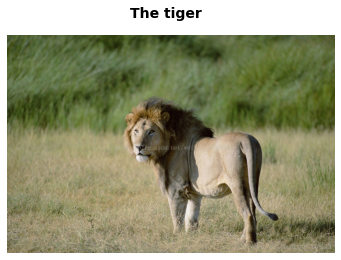

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:Restoring parameters from D:\Python\TFslim\checkpoints\vgg_16.ckpt


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


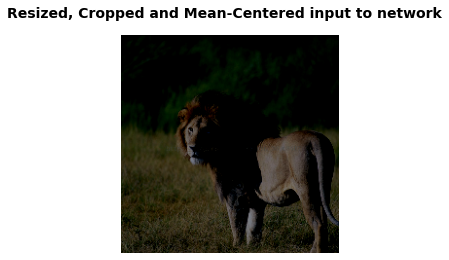

5 things
Probability 1.00 => [lion, king of beasts, Panthera leo]
5 things
Probability 0.00 => [chow, chow chow]
5 things
Probability 0.00 => [collie]
5 things
Probability 0.00 => [baboon]
5 things
Probability 0.00 => [ox]


In [21]:
#Tensorflow 
# 以 Slim 內建的 VGG-16 神經網路進行訓練
#---------------------------------------------------------------------------------------------------------------
import sys ; sys.path.append(r"D:\Python\TFslim\models-master\research\slim") ; 
import dataset_utils
import os
import tensorflow as tf

#---------------------------------------------------------------------------------------------------------------
#下載模組
#---------------------------------------------------------------------------------------------------------------

url = "http://download.tensorflow.org/models/vgg_16_2016_08_28.tar.gz"
checkpoints_dir = 'D:\Python\TFslim\checkpoints'
if not tf.gfile.Exists(checkpoints_dir):
    tf.gfile.MakeDirs(checkpoints_dir)
#dataset_utils.download_and_uncompress_tarball(url, checkpoints_dir)

#---------------------------------------------------------------------------------------------------------------
#神經網路架構
#---------------------------------------------------------------------------------------------------------------
import numpy as np
import cv2
from datasets import imagenet
from nets import vgg
from preprocessing import vgg_preprocessing
from matplotlib import pyplot as plt
slim=tf.contrib.slim
image_size=vgg.vgg_16.default_image_size
with tf.Graph().as_default():
    
    #載入影像
    image = cv2.imread(r"D:\Python\TFslim\checkpoints\tiger.jpg")
    image = cv2.cvtColor(image, 4)
    plt.imshow(image)
    plt.suptitle("The tiger",fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()    

    
    #vgg 架構
    processed_image   = vgg_preprocessing.preprocess_image(image, image_size, image_size, is_training=False)
    processed_images  = tf.expand_dims(processed_image, 0)
    with slim.arg_scope(vgg.vgg_arg_scope()):
        logits, _ = vgg.vgg_16(processed_images,num_classes=1000,is_training=False)


    probabilities = tf.nn.softmax(logits)
    init_fn = slim.assign_from_checkpoint_fn(os.path.join(checkpoints_dir, 'vgg_16.ckpt'),slim.get_model_variables('vgg_16'))

    
    #執行計算圖
    with tf.Session() as sess:

        init_fn(sess)
        network_input, probabilities = sess.run([processed_image,probabilities])
        probabilities = probabilities[0, 0:]
        sorted_inds = [i[0] for i in sorted(enumerate(-probabilities),key=lambda x:x[1])]

        
    # 輸出結果圖片
    plt.imshow( network_input / (network_input.max() - network_input.min()) )
    plt.suptitle("Resized, Cropped and Mean-Centered input to network",fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()

    
    #預測
    names = imagenet.create_readable_names_for_imagenet_labels()
    for i in range(5):
        print("5 things")
        index = sorted_inds[i]
        print('Probability %0.2f => [%s]' % (probabilities[index], names[index+1]))

    res = slim.get_model_variables()

# (4) Tensorflow Layer

In [24]:
#TensorFlow Layer 
# 以 原生Tensorflow 建構 CNN 卷積神蹟網路架構
#---------------------------------------------------------------------------------------------------------------
#https://tensorflow.juejin.im/tutorials/layers.html
def cnn_model_fn(features, labels, mode):
    
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])
    conv1 = tf.layers.conv2d(inputs=input_layer,filters=32,kernel_size=[5, 5],padding="same",activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    conv2 = tf.layers.conv2d(inputs=pool1,filters=64,kernel_size=[5, 5],padding="same",activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    logits = tf.layers.dense(inputs=dropout, units=10)
    
    
    # mode 屬於預測模式
    predictions = {"classes": tf.argmax(input=logits, axis=1), "probabilities": tf.nn.softmax(logits, name="softmax_tensor")}
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    #計算損失
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    
    # mode 屬於訓練模式
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(loss=loss,global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    # 評估模型
    eval_metric_ops = {"accuracy": tf.metrics.accuracy(labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

# TF Estimator

In [ ]:
#TF Estimator 
# 使用 TF Estimator  中的線性回歸 API
#---------------------------------------------------------------------------------------------------------------
import tensorflow as tf
import numpy as np 
#輸入訓練資料
def train_input_data_fn():
    features = {"sq_footage":[ 1000  ,  2000 ,  3000 , 1000  , 2000  , 3000 ],
                "type":      ["house","house","house", "apt" , "apt" , "apt"]}
    labels   =               [ 500   ,  1000 ,  1500 ,  700  , 1300  , 1900  ]
    return features,labels

#輸入預測資料
def predict_input_data_fn():
    features = {"sq_footage":[ 1500  ,  1500 ],
                "type":      ["house",  "apt"]}
    return features

featcols = [
    tf.feature_column.numeric_column("sq_footage"),
    tf.feature_column.categorical_column_with_vocabulary_list("type",["house","apt"])
]

#進行回歸
model = tf.estimator.LinearRegressor(featcols)
model.train(train_input_data_fn,steps=100)

#進行評估
#train_evaluate = model.evaluate(input_fn=train_input_data_fn)
#test_evaluate  = model.evaluate(input_fn=predict_input_data_fn)

#預測
preds  = model.predict(predict_input_data_fn)
predictions = np.array([item['predictions'][0] for item in preds ])
#predictions


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\fre5x\\AppData\\Local\\Temp\\tmp_jqh20r1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
I

# (6) Keras 

In [1]:
# Keras 
# 以 keras 建構 CNN 卷積神蹟網路架構
#---------------------------------------------------------------------------------------------------------------
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

start.....bulid CNN ModeL
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)             

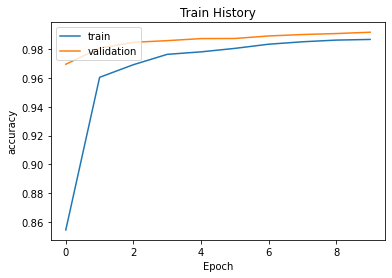

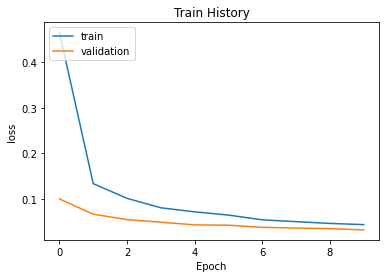


the scores
10000/10000 [==============================] - 2s 191us/step

the prediction


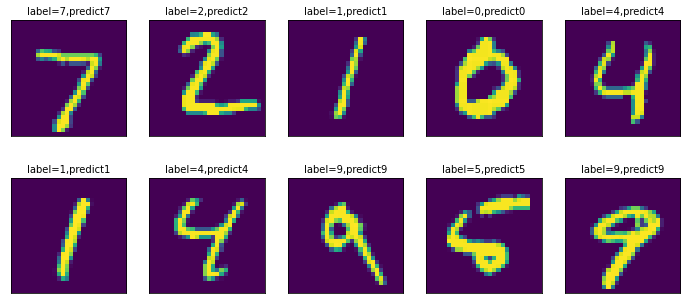

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,0,0,2,1,2,0
1,0,1131,1,0,0,1,0,1,1,0
2,3,0,1026,1,0,0,0,1,1,0
3,0,0,1,1003,0,2,0,1,3,0
4,0,0,0,0,978,0,1,0,1,2
5,1,0,1,3,0,883,3,0,0,1
6,3,2,0,0,1,2,949,0,1,0
7,0,2,8,1,0,0,0,1016,1,0
8,1,0,0,1,0,0,0,1,970,1


In [11]:
# keras
# 以 keras 建構 CNN 卷積神蹟網路架構 與 手寫識別 範例
# https://www.tensorflow.org/api_docs/python/tf?hl=zh-tw
# 查詢 mnist 函式
#---------------------------------------------------------------------------------------------------------------
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(10)


def plot_image_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14) #image of size in figure
    if num>25: num=25
    for i in range(num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx])
        title ="label="+str(labels[idx])
        if len(prediction)>0 : 
            title+=",predict"+str(prediction[idx]) 
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])#not display scale on figure
        idx+=1
    plt.show()

def show_train_history(train_history,train,Validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[Validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
    
    
    
#______________________________________________________________________________________________________

#loading MNIST database
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#reshape
x_train4D = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test4D  = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

#normalize
x_train4D_normalize = x_train4D/255
x_test4D_normalize  = x_test4D/255

#label onehot-encoding
y_trainOneHot = np_utils.to_categorical(y_train)
y_testOneHot  = np_utils.to_categorical(y_test)


#______________________________________________________________________________________________________
#bulid model
print('start.....bulid CNN ModeL')
input_size_m = 28
input_size_n = 28
input_size_depth = 1

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model = Sequential()

#frist - > convalution and MaxPooling
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape = (input_size_m,input_size_n,input_size_depth),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#second -> convalution and MaxPooling
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #solving overfitting

#bulid flatten layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(10,activation='softmax'))
print(model.summary())

#______________________________________________________________________________________________________

#trainning
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
train_history = model.fit( x=x_train4D_normalize, y=y_trainOneHot, validation_split =0.2, epochs=10, batch_size=300, verbose=2)


print('')
print('')
print('show_train_history')
print(train_history.history);
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')


#______________________________________________________________________________________________________
#the result
print('')
print('the scores')
scores = model.evaluate(x_test4D_normalize, y_testOneHot)

print('')
print('the prediction')
prediction = model.predict_classes(x_test4D_normalize)

plot_image_labels_prediction(x_test,y_test,prediction,idx=0)
pd.crosstab(y_test,prediction,rownames=['label'],colnames=['predict'])


# Tensorflow Learn

In [10]:
# TFLearn
# 以 TFLearn 建構 CNN 卷積神蹟網路架構
# https://www.tensorflow.org/api_docs/python/tf?hl=zh-tw
# 查詢 mnist 函式
#---------------------------------------------------------------------------------------------------------------

import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

#加載大名頂頂的mnist數據集（http://yann.lecun.com/exdb/mnist/）
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)
X = X.reshape([-1, 28, 28, 1])
testX = testX.reshape([-1, 28, 28, 1])

network = input_data(shape=[None, 28, 28, 1], name='input')
# CNN中的卷積操作,下面會有詳細解釋
network = conv_2d(network, 32, 3, activation='relu', regularizer="L2")
# 最大池化操作
network = max_pool_2d(network, 2)
# 局部響應歸一化操作
network = local_response_normalization(network)
network = conv_2d(network, 64, 3, activation='relu', regularizer="L2")
network = max_pool_2d(network, 2)
network = local_response_normalization(network)
# 全連接操作
network = fully_connected(network, 128, activation='tanh')
# dropout操作
network = dropout(network, 0.8)
network = fully_connected(network, 256, activation='tanh')
network = dropout(network, 0.8)
network = fully_connected(network, 10, activation='softmax')
# 迴歸操作
network = regression(network, optimizer='adam', learning_rate=0.01,
                     loss='categorical_crossentropy', name='target')

# Training
# DNN操作，構建深度神經網絡
model = tflearn.DNN(network, tensorboard_verbose=0)
model.fit({'input': X}, {'target': Y}, n_epoch=5,
           validation_set=({'input': testX}, {'target': testY}),
           snapshot_step=100, show_metric=True, run_id='convnet_mnist')


ModuleNotFoundError: No module named 'tflearn'

# (8) DataSets 應用

loading sample  dataset..
(tf.float32, tf.int32)
(TensorShape([Dimension(None), Dimension(96), Dimension(96), Dimension(None)]), TensorShape([Dimension(None)]))
0


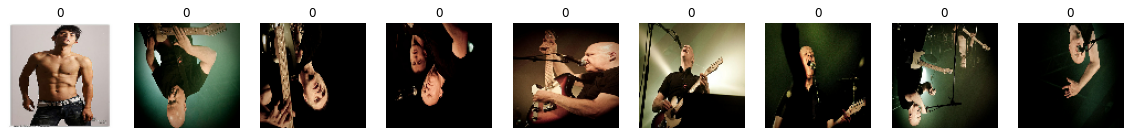

In [13]:
import os
import tensorflow as tf
from PIL import Image
from sklearn.utils import shuffle
import numpy as np
from tqdm import tqdm #Tool kit　:　Progress Ｂar

################  搜尋資料夾　產生檔名與標籤清單  ##########################
def load_sample(sample_dir,shuffleflag = True):
    '''遞歸讀取檔案。只支援一級。傳回檔名、數值標簽、數值對應的標簽名'''
    print ('loading sample  dataset..')
    lfilenames = []
    labelsnames = []
    for (dirpath, dirnames, filenames) in os.walk(sample_dir):#遞歸檢查資料夾
        for filename in filenames:                            #檢查所有檔名
            #print(dirnames)
            filename_path = os.sep.join([dirpath, filename])
            lfilenames.append(filename_path)               #加入檔名
            labelsnames.append( dirpath.split('\\')[-1] )#加入檔名對應的標簽

    lab= list(sorted(set(labelsnames)))  #產生標簽名稱清單
    labdict=dict( zip( lab  ,list(range(len(lab)))  )) #產生字典

    labels = [labdict[i] for i in labelsnames]
    if shuffleflag == True:
        return shuffle(np.asarray( lfilenames),np.asarray( labels)),np.asarray(lab)
    else:
        return (np.asarray( lfilenames),np.asarray( labels)),np.asarray(lab)

################  隨機改變影像（亮度、翻轉、剪裁等）  ##########################
def _distorted_image(image,size,ch=1,shuffleflag = False,cropflag  = False,
                     brightnessflag=False,contrastflag=False):    #定義函數，實現變化圖片
    distorted_image =tf.image.random_flip_left_right(image)

    if cropflag == True:                                                #隨機裁剪
        s = tf.random_uniform((1,2),int(size[0]*0.8),size[0],tf.int32)
        distorted_image = tf.random_crop(distorted_image, [s[0][0],s[0][0],ch])

    distorted_image = tf.image.random_flip_up_down(distorted_image)#上下隨機翻轉
    if brightnessflag == True:#隨機變化亮度
        distorted_image = tf.image.random_brightness(distorted_image,max_delta=10)
    if contrastflag == True:   #隨機變化比較度
        distorted_image = tf.image.random_contrast(distorted_image,lower=0.2, upper=1.8)
    if shuffleflag==True:
        distorted_image = tf.random_shuffle(distorted_image)#沿著第0維亂序
    return distorted_image

################  正規化影像  ##########################
def _norm_image(image,size,ch=1,flattenflag = False):    #定義函數，實現歸一化，並且拍平
    image_decoded = image/255.0
    if flattenflag==True:
        image_decoded = tf.reshape(image_decoded, [size[0]*size[1]*ch])
    return image_decoded

################  隨機改變影像（翻轉）  ##########################
#pip install -U scikit-image
from skimage import transform
def _random_rotated30(image, label): #定義函數實現圖片隨機旋轉動作
    
    def _rotated(image):                #封裝好的skimage模組，來進行圖片旋轉30度
        shift_y, shift_x = np.array(image.shape.as_list()[:2],np.float32) / 2.
        tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(30))
        tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
        tf_shift_inv,image.size = transform.SimilarityTransform(translation=[shift_x, shift_y]),image.shape#相容transform函數
        image_rotated = transform.warp(image, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
        return image_rotated

    def _rotatedwrap():
        image_rotated = tf.py_function( _rotated,[image],[tf.float64])   #呼叫第三方函數
        return tf.cast(image_rotated,tf.float32)[0]

    a = tf.random_uniform([1],0,2,tf.int32)#實現隨機功能
    image_decoded = tf.cond(tf.equal(tf.constant(0),a[0]),lambda: image,_rotatedwrap)

    return image_decoded, label


################  建立　DataSet 資料夾  ##########################
def dataset(directory,size,batchsize,random_rotated=False):#定義函數，建立資料集
    """ parse  dataset."""
    (filenames,labels),_ =load_sample(directory,shuffleflag=False) #載入檔名稱與標簽
    def _parseone(filename, label):                         #解析一個圖片檔案
        """ Reading and handle  image"""
        image_string = tf.read_file(filename)         #讀取整個檔案
        image_decoded = tf.image.decode_image(image_string)
        image_decoded.set_shape([None, None, None])    # 必須有這句，不然下面會轉化失敗
        image_decoded = _distorted_image(image_decoded,size)#對圖片做扭曲變化
        image_decoded = tf.image.resize(image_decoded, size)  #變化尺寸
        image_decoded = _norm_image(image_decoded,size)#歸一化
        image_decoded = tf.cast(image_decoded,dtype=tf.float32)
        label = tf.cast(  tf.reshape(label, []) ,dtype=tf.int32  )#將label 轉為張量
        return image_decoded, label

    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))#產生Dataset物件
    dataset = dataset.map(_parseone)   #有圖片內容的資料集

    if random_rotated == True:
        dataset = dataset.map(_random_rotated30)

    dataset = dataset.batch(batchsize) #批次劃分資料集
    tf.data.Dataset.zip(dataset)
    return dataset


################  Display Func ##########################
def showresult(subplot,title,thisimg):          #顯示單一圖片
    p =plt.subplot(subplot)
    p.axis('off')
    p.imshow(thisimg)
    p.set_title(title)

def showimg(index,label,img,ntop):   #顯示
    plt.figure(figsize=(20,10))     #定義顯示圖片的寬、高
    plt.axis('off')
    ntop = min(ntop,9)
    print(index)
    for i in range (ntop):
        showresult(100+10*ntop+1+i,label[i],img[i])
    plt.show()

def getone(dataset):
    iterator = dataset.make_one_shot_iterator()			#產生一個迭代器
    one_element = iterator.get_next()					#從iterator裡取出一個元素
    return one_element

########################################################################
#　　　　　　　　 　　　　　　　 程式運行
########################################################################
#directory='man_woman\\' #定義樣本路徑
#(filenames,labels),_ =load_sample(directory,shuffleflag=False) #載入檔名稱與標簽

sample_dir=r"man_woman"
size = [96,96]
batchsize = 10
tdataset  = dataset(sample_dir,size,batchsize)
one_element1 = getone(tdataset)	#從tdataset裡取出一個元素
print(tdataset.output_types)  #列印資料集的輸出訊息
print(tdataset.output_shapes)
with tf.Session() as sess:	# 建立階段（session）
    sess.run(tf.global_variables_initializer())  #起始化
    try:
        for step in np.arange(1):
            value = sess.run(one_element1)
            showimg(step,value[1],np.asarray( value[0]*255,np.uint8),10)       #顯示圖片

    except tf.errors.OutOfRangeError:           #捕捉例外
        print("Done!!!")



# (9) Tensorflow 手寫識別
### Tensorflow 手寫識別(Simply)

In [ ]:
#Tensorflow 
# 手寫識別
# https://www.tensorflow.org/api_docs/python/tf?hl=zh-tw
# 查詢 mnist 函式
#---------------------------------------------------------------------------------------------------------------
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np 

# 讀取 手寫識別資料庫
#---------------------------------------------------------------------------------------------------------------
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
print('\nLoading MNIST DataBase\n',
      '-------------------------------------------\n',
      'train number=',mnist.train.num_examples,"\n",
      'vakidation number=',mnist.validation.num_examples,"\n",
      'test number=',mnist.test.num_examples,"\n",
      'train image shape', mnist.train.images.shape,"\n",
      'label image shape', mnist.train.labels.shape,"\n",
      'train image size' , mnist.train.images[0].size,"\n")


# 建立 讀影像函數
#---------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
img_w = 28
img_h = 28
def plot_image(image,w,h):
    plt.imshow(image.reshape(w,h),cmap='binary')
    plt.show()
    
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf() # 開畫布
    fig.set_size_inches(12,14)
    if num>25 : num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(np.reshape(images[idx],(img_w,img_h)),cmap='binary')
        title = "label="+str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict"+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

print('\n')
print('Loading MNIST Images\n',
      '-------------------------------------------\n')
plot_images_labels_prediction(mnist.train.images,mnist.train.labels,[],0)

# 建立 讀影像函數 (批次)
#---------------------------------------------------------------------------------------------------------------
batch_images_xs, batch_image_ys = mnist.train.next_batch(batch_size=100)
print('\n')
print('Loading MNIST Images(batch)\n',
      '-------------------------------------------\n')
plot_images_labels_prediction(batch_images_xs,batch_image_ys,[],0)


# 建立 神經網路 (layer)
#---------------------------------------------------------------------------------------------------------------
def layer(output_dim,input_dim,inputs,activation=None):
    W = tf.Variable(tf.random_normal([input_dim,output_dim]))
    b = tf.Variable(tf.random_normal([1,output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs =XWb
    else:
        outputs = activation(XWb)
    return outputs

# 建立 神經網路 (Network)
#---------------------------------------------------------------------------------------------------------------
from time import time
#Network
x_dim  = 784
h1_dim = 1000
x  = tf.placeholder("float",[None,x_dim])
h1 = layer(output_dim=h1_dim ,input_dim=x_dim ,inputs=x ,activation=tf.nn.relu)
y_predict = layer(output_dim=10  ,input_dim=h1_dim ,inputs=h1 ,activation=None)
y_label   = tf.placeholder("float",[None,10])
loss_func = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict,labels=y_label))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_func)
correct_prediction = tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

#train
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
loss_list = []
epoch_list= []
accuracy_list=[]
starTime=time()

print('Train Neural Network \n',
      '-------------------------------------------\n')
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x:batch_x,y_label:batch_y}) # find-> placeholder
    loss,acc = sess.run([loss_func,accuracy],feed_dict={x:mnist.validation.images, y_label:mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Epoch :",'%02d' %(epoch+1), "Loss=", "{:.9f}".format(loss), "accuracy=",acc)
    
duration = time() - starTime
print("Train Finshed Task : ",duration)

# 繪製結果
#---------------------------------------------------------------------------------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list,loss_list,label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='upper left')
plt.show()

import matplotlib.pyplot as plt2
fig2 = plt2.gcf()
fig2.set_size_inches(4,2)
plt2.plot(epoch_list,accuracy_list,label='accuracy')
plt2.ylim(0.8,1)
plt2.ylabel('loss')
plt2.xlabel('accuracy')
plt2.legend()
plt2.show()

#預測
#---------------------------------------------------------------------------------------------------------------
print('Predict Neural Network \n',
      '-------------------------------------------\n')
prediction_result=sess.run(tf.argmax(y_predict,1),feed_dict={x: mnist.test.images })
plot_images_labels_prediction(mnist.test.images, mnist.test.labels,prediction_result,0) #顯示前 10 筆

#找出預測錯誤
#---------------------------------------------------------------------------------------------------------------
print('Predict Error : \n',
      '-------------------------------------------\n')
for i in range(mnist.test.num_examples,):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

### Tensorflow 手寫識別 (CNN)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

Loading MNIST DataBase
 -------------------------------------------
 train number= 55000 
 vakidation number= 5000 
 test number= 10000 
 train image shape (55000, 784) 
 label image shape (55000, 10) 
 train image size 784 

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate 

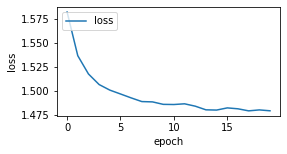

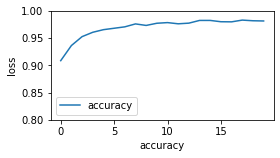

Predict Neural Network 
 -------------------------------------------



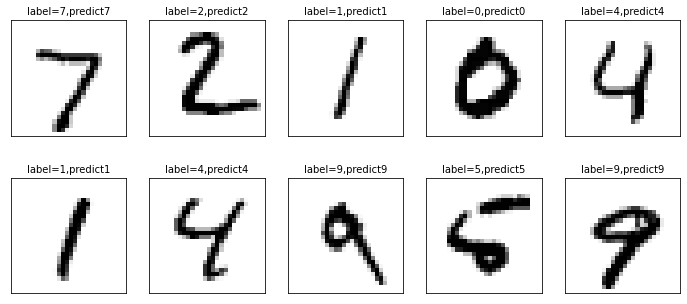

Save 
 -------------------------------------------



In [1]:
#Tensorflow 
# 手寫識別
# https://www.tensorflow.org/api_docs/python/tf?hl=zh-tw
# 查詢 mnist 函式
#---------------------------------------------------------------------------------------------------------------
import tensorflow as tf
import numpy as np 
from time import time
from tensorflow.examples.tutorials.mnist import input_data
#import tensorflow.examples.tutorials.mnist.input_data as input_data


# 讀取 手寫識別資料庫
#---------------------------------------------------------------------------------------------------------------
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
print('\nLoading MNIST DataBase\n',
      '-------------------------------------------\n',
      'train number=',mnist.train.num_examples,"\n",
      'vakidation number=',mnist.validation.num_examples,"\n",
      'test number=',mnist.test.num_examples,"\n",
      'train image shape', mnist.train.images.shape,"\n",
      'label image shape', mnist.train.labels.shape,"\n",
      'train image size' , mnist.train.images[0].size,"\n")


# 建立 讀影像函數
#---------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
img_w = 28;img_h = 28
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf() # 開畫布
    fig.set_size_inches(12,14)
    if num>25 : num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(np.reshape(images[idx],(img_w,img_h)),cmap='binary')
        title = "label="+str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict"+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

def show_images_labels_predict_error(images,labels,prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    i=0;j=0
    while i<10:
        if prediction_result[j]!=np.argmax(labels[j]):
            ax=plt.subplot(5,5, 1+i)
            ax.imshow(np.reshape(images[j],(28, 28)), 
                      cmap='binary')
            ax.set_title("j="+str(j)+
                         ",l=" +str(np.argmax(labels[j]))+
                         ",p="+str(prediction_result[j])
                         ,fontsize=9) 
            i=i+1  
        j=j+1
    plt.show()    

    
# 建立 卷積神經網路(靜置圖)
#---------------------------------------------------------------------------------------------------------------
def weight(shape): return tf.Variable(tf.truncated_normal(shape, stddev=0.1),name ='W') #variable
def bias(shape): return tf.Variable(tf.constant(0.1, shape=shape), name = 'b') #vaiable
def conv2d(x, W): return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME') #convolution 2x2
def max_pool_2x2(x):return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

#input layer
x = tf.placeholder("float",shape=[None, 784] ,name="x")    
x_image = tf.reshape(x, [-1, 28, 28, 1])

#convolution layer 1
W1 = weight([5,5,1,16]) # filter size is 5x5, image number: 1 ->16
b1 = bias([16])
Conv1=conv2d(x_image, W1)+ b1
C1_Conv = tf.nn.relu(Conv1 )
C1_Pool = max_pool_2x2(C1_Conv) #[14,14]

#convolution layer 2
W2 = weight([5,5,16,36]) # filter size is 5x5, image number: 16 -> 36  
b2 = bias([36])
Conv2=conv2d(C1_Pool, W2)+ b2
C2_Conv = tf.nn.relu(Conv2)
C2_Pool = max_pool_2x2(C2_Conv) #[7,7]

#fully connnected layer, Start Netual Network!!
C2_dim = 7*7*36
flat = tf.reshape(C2_Pool, [-1, C2_dim])

#hidden layer
W3 = weight([C2_dim, 128])
b3 = bias([128])
h1 = tf.nn.relu(tf.matmul(flat, W3)+b3)
h1_dropout = tf.nn.dropout(h1, keep_prob=0.8)

#output
W4 = weight([128,10])
b4 = bias([10])
y_predict= tf.nn.softmax(tf.matmul(h1_dropout,W4)+b4,  axis=None, name="prediction")

#optimizer
learning= 0.0001
y_label = tf.placeholder("float", shape=[None, 10], name="y_label")
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict , labels=y_label))
optimizer = tf.train.AdamOptimizer(learning_rate=learning).minimize(loss_function)

#evaluate_model
correct_prediction = tf.equal(tf.argmax(y_predict, 1),tf.argmax(y_label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


# 建立 卷積神經網路(訓練模型)
#---------------------------------------------------------------------------------------------------------------
from tensorflow.python.framework import graph_util
from tensorflow.python.platform import gfile
def train_model(trainEpochNum=20,batchSizeNum=100) :
    trainEpochs = trainEpochNum
    batchSize = batchSizeNum
    totalBatchs = int(mnist.train.num_examples/batchSize)
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    startTime=time()

    for epoch in range(trainEpochs):
        for i in range(totalBatchs):
            batch_x, batch_y = mnist.train.next_batch(batchSize)
            sess.run(optimizer,feed_dict={x: batch_x,y_label: batch_y})

        loss,acc = sess.run([loss_function,accuracy],feed_dict={x: mnist.validation.images, y_label: mnist.validation.labels})
        epoch_list.append(epoch)
        loss_list.append(loss);accuracy_list.append(acc)    
        print("Train Epoch:", '%02d' % (epoch+1), "Loss=","{:.9f}".format(loss)," Accuracy=",acc)

    duration =time()-startTime
    print("Train Finished takes:",duration) 
    
    #save_model
    graph_def = tf.get_default_graph().as_graph_def()
    output_graph_def = graph_util.convert_variables_to_constants(sess,graph_def, ['prediction'])
    with tf.gfile.GFile('model.pb', 'wb') as fid:
        serialized_graph = output_graph_def.SerializeToString()
        fid.write(serialized_graph)
    print("Model saved in file: %s" % 'model.pb')
        
    return sess

    
epoch_list=[];
accuracy_list=[];
loss_list=[];
sess = train_model()

# 繪製結果
#---------------------------------------------------------------------------------------------------------------
def plot_loss_function(epoch_list, loss_list):
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig = plt.gcf()
    fig.set_size_inches(4,2)
    plt.plot(epoch_list,loss_list,label='loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'],loc='upper left')
    plt.show()

def plot_accuracy( epoch_list, accuracy_list):
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig = plt.gcf()
    fig.set_size_inches(4,2)
    plt.plot(epoch_list,accuracy_list,label='accuracy')
    plt.ylim(0.8,1)
    plt.ylabel('loss')
    plt.xlabel('accuracy')
    plt.legend()
    plt.show()

plot_loss_function(epoch_list, loss_list)
plot_accuracy(epoch_list, accuracy_list)

#預測
#---------------------------------------------------------------------------------------------------------------
print('Predict Neural Network \n',
      '-------------------------------------------\n')
prediction_result=sess.run(tf.argmax(y_predict,1),feed_dict={x: mnist.test.images ,y_label: mnist.test.labels})
plot_images_labels_prediction(mnist.test.images, mnist.test.labels,prediction_result,0) #顯示前 10 筆


#儲存 model & tensorboard log 檔
#---------------------------------------------------------------------------------------------------------------
print('Save \n',
      '-------------------------------------------\n')
def save_Saver(FileName):
    saver = tf.train.Saver()
    save_path = saver.save(sess, FileName)
    print("Saver saved in file: %s" % save_path)
    
def save_tensorboard_log(FileName):
    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter(FileName,sess.graph)
    rint("log saved in file: %s" % FileName)
    
#save_Saver("saveModel/CNN_model1")
#save_tensorboard_log('log/CNN')

# (10) Tensorflow 儲存與讀取模組
### Tensorflow 儲存與讀取模組 (. cpkt )

In [1]:
#12-23
'''
import tensorflow as tf
from tensorflow.python.framework import graph_util
from tensorflow.python.platform import gfile
graph_def = tf.get_default_graph().as_graph_def()
output_graph_def = graph_util.convert_variables_to_constants(sess,graph_def,['y_predict'])
model_f = tf.gfile.GFile("model.pb","wb")
model_f.write(output_graph_def.SerializeToString())
'''

'\nimport tensorflow as tf\nfrom tensorflow.python.framework import graph_util\nfrom tensorflow.python.platform import gfile\ngraph_def = tf.get_default_graph().as_graph_def()\noutput_graph_def = graph_util.convert_variables_to_constants(sess,graph_def,[\'y_predict\'])\nmodel_f = tf.gfile.GFile("model.pb","wb")\nmodel_f.write(output_graph_def.SerializeToString())\n'

In [2]:
#儲存 model (.cpkt) & tensorboard log 檔
#---------------------------------------------------------------------------------------------------------------
print('Save \n',
      '-------------------------------------------\n')
def save_Saver(FileName):
    saver = tf.train.Saver()
    save_path = saver.save(sess, FileName)
    print("Saver saved in file: %s" % save_path)
    
def save_tensorboard_log(FileName):
    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter(FileName,sess.graph)
    rint("log saved in file: %s" % FileName)
    
#save_Saver("saveModel/CNN_model1")
#save_tensorboard_log('log/CNN')

#讀取 model & tensorboard log 檔
#---------------------------------------------------------------------------------------------------------------
saver = tf.train.Saver()
saver.restore(sess, "saveModel/CNN_model1")
print("Model restored.")
print("all values %s" % sess.run(tf.global_variables()))
print("w1 value : %s" % sess.run(W1))

Save 
 -------------------------------------------

INFO:tensorflow:Restoring parameters from saveModel/CNN_model1
Model restored.
all values [array([[[[-0.17346022,  0.15448637,  0.05638338,  0.18849018,
           0.00163456, -0.15577953, -0.00983738, -0.00360356,
          -0.06193496, -0.02581607,  0.07923663, -0.06695454,
           0.07728127, -0.23218042,  0.01073649, -0.0617131 ]],

        [[-0.01396291, -0.03493156,  0.24395812,  0.19990572,
           0.2839649 ,  0.19745004,  0.0388054 ,  0.0049115 ,
          -0.10611957, -0.08366688,  0.10195702,  0.03138024,
          -0.27752095, -0.11481513, -0.03382432,  0.02294896]],

        [[-0.05936269, -0.12933779,  0.28594875,  0.06720056,
           0.08479052,  0.24196963,  0.07007052, -0.02816743,
           0.14891173, -0.06360228,  0.25372627, -0.04960496,
          -0.25045663, -0.10886218, -0.06553373,  0.19200635]],

        [[-0.14380896, -0.17261769,  0.1830526 ,  0.02368228,
           0.15138738,  0.22999518, -0.201

### Tensorflow 儲存與讀取模組 (. pb )

In [8]:
#Tensorflow 
# 存取 手寫識別 模組(.pb)
#https://tensorflow.juejin.im/programmers_guide/saved_model.html
#-------------------------------------------------------------------------------------------------------------
from tensorflow.python.saved_model import tag_constants
saved_model_dir = "./TF1xCNNModel"
builder = tf.saved_model.builder.SavedModelBuilder(saved_model_dir)
input  = {'inputs_x':tf.saved_model.utils.build_tensor_info(x)}
output = {'outputs_y':tf.saved_model.utils.build_tensor_info(y_predict)}
#signature = tf.saved_model.signature_def_utils.build_signature_def(input,output,'sig_name')
builder.add_meta_graph_and_variables(sess, ['serve'])
builder.save()

#saved_model_cli show --dir D:\Python\CNNModel\ --all
#saved_model_cli show --dir D:\Python\CNNModel\ --tag_set tag_constants.SERVING --signature_def weilly

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ./TF1xCNNModel\saved_model.pb


b'./TF1xCNNModel\\saved_model.pb'

In [2]:
saved_model_dir = "./TF1xCNNModel"
builder = tf.saved_model.builder.SavedModelBuilder(saved_model_dir)
builder.add_meta_graph_and_variables(sess, ['tag_string'])
builder.save()

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ./TF1xCNNModel\saved_model.pb


b'./TF1xCNNModel\\saved_model.pb'

# (11) Tensorflow 手寫識別(修改)

In [11]:
#Tensorflow 
# 讀取 手寫識別 模組(.pb) 並預測
#-------------------------------------------------------------------------------------------------------------
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from time import time
import cv2
# 讀取 手寫識別資料庫
#---------------------------------------------------------------------------------------------------------------
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

# 讀取 手寫識別a模組
#---------------------------------------------------------------------------------------------------------------
tf.reset_default_graph()
saved_model_dir = "./CNNModel"
testImage = mnist.test.images[1];
with tf.Session() as sess:
    meta_grpah_def = tf.saved_model.loader.load(sess,['serve'], saved_model_dir)
    signature = meta_grpah_def.signature_def
    
    x_tensor_name = signature['weilly'].inputs['x:0'].name
    y_tensor_name = signature['weilly'].outputs['prediction:0'].name
    
    i_graph = tf.get_default_graph()
    y = i_graph.get_tensor_by_name('prediction:0')
    x = i_graph.get_tensor_by_name('x:0')
    
    test=np.expand_dims(testImage, 0)
    predict = sess.run(tf.argmax(y,1),feed_dict={x: test})
    print(predict)
    
    ax = plt.subplot(5,5,1)
    ax.imshow(np.reshape(testImage,(28,28)),cmap='binary')
    plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from TF1xCNNModel\variables\variables


AttributeError: inputs

In [11]:
#Tensorflow 
# 存取 手寫識別 模組(.pb) -2
#https://blog.csdn.net/samylee/article/details/85067155
#-------------------------------------------------------------------------------------------------------------

import tensorflow as tf
from tensorflow.python.platform import gfile

inti = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(inti)
    
    # define graph to write
    constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph_def, ['prediction'])
 
    # write pb file
    with tf.gfile.FastGFile('CNNmodel.pb', mode='wb') as f:
         f.write(constant_graph.SerializeToString())


INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[3]


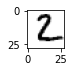

In [7]:
#Tensorflow 
# 讀取 手寫識別 模組(.pb) 並預測-2
#-------------------------------------------------------------------------------------------------------------
import tensorflow as tf
from tensorflow.python.platform import gfile

import numpy as np 
import matplotlib.pyplot as plt
from time import time

import cv2
# 讀取 手寫識別資料庫
#---------------------------------------------------------------------------------------------------------------
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

# 讀取 手寫識別a模組
#---------------------------------------------------------------------------------------------------------------
tf.reset_default_graph()
testImage = mnist.test.images[1];
with tf.Session() as sess:
    with gfile.FastGFile('./CNNmodel.pb', 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        sess.graph.as_default()
        tf.import_graph_def(graph_def, name='')
    
    sess.run(tf.global_variables_initializer())
    

    x_tensor_name = sess.graph.get_tensor_by_name('x:0')
    y_tensor_name = sess.graph.get_tensor_by_name('prediction:0')
    
    i_graph = tf.get_default_graph()
    x = i_graph.get_tensor_by_name('x:0')
    y = i_graph.get_tensor_by_name('prediction:0')
    
    
    test=np.expand_dims(testImage, 0)
    predict = sess.run(tf.argmax(y,1),feed_dict={x: test})
    print(predict)
    
    ax = plt.subplot(5,5,1)
    ax.imshow(np.reshape(testImage,(28,28)),cmap='binary')
    plt.show() 
             
#錯誤結果?
#轉 TFlite #https://blog.csdn.net/yuanlulu/article/details/85731488

# (12) Tensorflow 靜態圖

## 在靜態圖設置儲存點

1.15.0


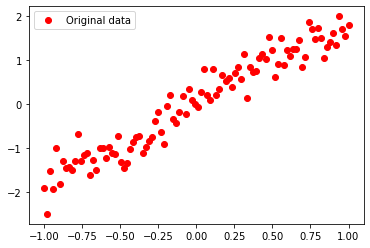

INFO:tensorflow:Restoring parameters from log/linermodel.cpkt-2800
 Dispaly Trainning Log
Epoch: 29 cost= 0.093321696 W= [1.9464427] b= [-0.00914547]
Epoch: 31 cost= 0.089323476 W= [1.859549] b= [0.01700799]
Epoch: 33 cost= 0.08932199 W= [1.8362983] b= [0.0258093]
Epoch: 35 cost= 0.0894065 W= [1.8302732] b= [0.02811937]
Epoch: 37 cost= 0.0894341 W= [1.8287153] b= [0.02871713]
Epoch: 39 cost= 0.08944161 W= [1.8283126] b= [0.02887172]
Epoch: 41 cost= 0.089443594 W= [1.8282084] b= [0.02891171]
Epoch: 43 cost= 0.08944409 W= [1.828182] b= [0.02892186]
Epoch: 45 cost= 0.08944422 W= [1.828175] b= [0.02892448]
Epoch: 47 cost= 0.08944426 W= [1.8281734] b= [0.02892509]
Epoch: 49 cost= 0.089444265 W= [1.8281729] b= [0.02892525]
Epoch: 51 cost= 0.089444265 W= [1.8281727] b= [0.02892536]
Epoch: 53 cost= 0.089444265 W= [1.8281727] b= [0.02892536]
Epoch: 55 cost= 0.089444265 W= [1.8281727] b= [0.02892536]
Epoch: 57 cost= 0.089444265 W= [1.8281727] b= [0.02892536]
Epoch: 59 cost= 0.089444265 W= [1.828

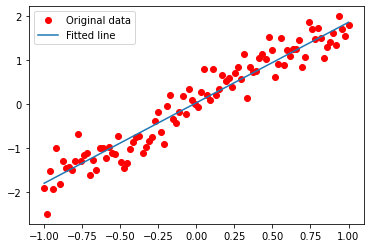

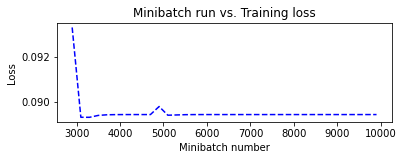

In [8]:
#使用靜態圖訓練一個具有檢查點的回歸模型

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

#（1）產生類比資料
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y=2x，但是加入了噪聲
#圖形顯示
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

tf.reset_default_graph()

#（2）建立網路模型

# 建立模型
# 占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 模型參數
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")
# 前嚮結構
z = tf.multiply(X, W)+ b
global_step = tf.Variable(0, name='global_step', trainable=False)
#反向改善
cost =tf.reduce_mean( tf.square(Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost,global_step) #梯度下降

# 起始化所有變數
init = tf.global_variables_initializer()
# 定義研讀參數
training_epochs = 100  # 20->100
display_step = 2

savedir = "log/"
saver = tf.train.Saver(tf.global_variables(), max_to_keep=1)#產生saver。 max_to_keep=1，表明最多只儲存一個檢查點檔案

#定義產生loss可視化的函數
plotdata = { "batchsize":[], "loss":[] }
def moving_average(a, w=10):
    if len(a) < w: 
        return a[:]    
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

#（3）建立session進行訓練
with tf.Session() as sess:
    sess.run(init)
    kpt = tf.train.latest_checkpoint(savedir)
    if kpt!=None:
        saver.restore(sess, kpt) #***重點, 載入檔案
     
    # 向模型輸入資料
    print(" Dispaly Trainning Log")
    while global_step.eval()/len(train_X) < training_epochs:
        step = int( global_step.eval()/len(train_X) )
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #顯示訓練中的詳細訊息
        if step % display_step == 0:
            loss = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", step+1, "cost=", loss,"W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA" ):
                plotdata["batchsize"].append(global_step.eval())
                plotdata["loss"].append(loss)
            saver.save(sess, savedir+"linermodel.cpkt", global_step)
                
    print (" Finished!")
    saver.save(sess, savedir+"linermodel.cpkt", global_step)
    
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))

    #顯示模型
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
     
    plt.show()

# (13) Tensorflow Hub 使用範例

In [3]:
!pip install --upgrade tensorflow_hub

  Using cached tensorflow_hub-0.10.0-py2.py3-none-any.whl (107 kB)


1001 <class 'list'> ['\ufeff背景known   \n', '丁鲷     \n', '金鱼     \n', '大白鲨     \n', '虎鲨     \n']
MobileNet V2 is Height : %d, Width : %d 224 224
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


[852 490 527] (3,)


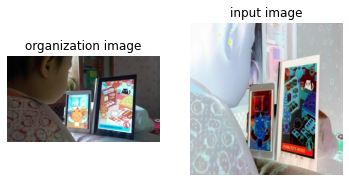

852 电视     



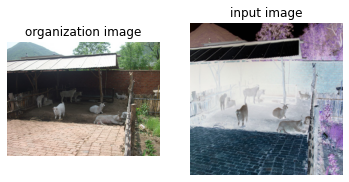

490 围栏     



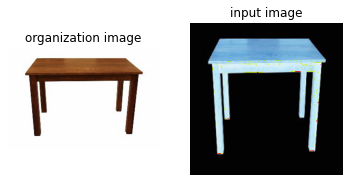

527 书桌     



In [17]:
#TH-Hub(MobileNet V2 物件識別)
#-------------------------------------------------------------------------
#測試圖片下載
    #https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/
    
#TF-Hub 下載模組
    #https://tfhub.dev/
#-------------------------------------------------------------------------

from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

TFHUB_CACHE_DIR="./TF_Hub_Example/mycache"

#pre-precess
with open('TF_Hub_Example\中文標籤_1000.csv','r+',encoding="utf-8") as f: 		#開啟檔案
    labels =list( map(lambda x:x.replace(',',' '),list(f))  )
    print(len(labels),type(labels),labels[:5]) #顯示輸出中文標簽
    
sample_images = [r'.\TF_Hub_Example\hy.jpg', r'.\TF_Hub_Example\ps.jpg',r'.\TF_Hub_Example\72.jpg']   #Test Image FileName
module_spec    = hub.load_module_spec("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/2")  # Model Name
height, width = hub.get_expected_image_size(module_spec) # get Model's (H,W)
print('MobileNet V2 is Height : %d, Width : %d', height, width)


#Tensor Graph
input_imgs = tf.placeholder(tf.float32, [None, height,width,3])#define Input Tensor
images  = 2 *( input_imgs / 255.0)-1.0 #normalize
module = hub.Module(module_spec) # load model in TF-Hub
logits = module(images)   # ouput shape [batch_size, num_classes].
y = tf.argmax(logits,axis = 1) #output tensor


#Tensor Actuvate
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())

    #reshape Image
    def preimg(img):                                    
        return np.asarray(img.resize((height, width)),dtype=np.float32).reshape(height, width,3)

    #Getting In/Out put
    batchImg = [ preimg( Image.open(imgfilename) ) for imgfilename in sample_images ]
    orgImg = [  Image.open(imgfilename)  for imgfilename in sample_images ]
    yv,img_norm = sess.run([y,images], feed_dict={input_imgs: batchImg})#Input BatchImag to Model => Getting output is yv and  img_norm
    print(yv,np.shape(yv))                                  
    
    #Display Image
    def showresult(yy,img_norm,img_org):                    
        plt.figure()
        p1 = plt.subplot(121)
        p2 = plt.subplot(122)
        p1.imshow(img_org)
        p1.axis('off')
        p1.set_title("organization image")

        p2.imshow((img_norm * 255).astype(np.uint8))
        p2.axis('off')
        p2.set_title("input image")

        plt.show()

        print(yy,labels[yy])

    #Display Result EyeTest
    for yy,img1,img2 in zip(yv,batchImg,orgImg):            #顯示每條結果及圖片
        showresult(yy,img1,img2)



loading sample  dataset..
['1' '10' '100+' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20'
 '21' '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34'
 '35' '36' '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48'
 '49' '5' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61'
 '62' '63' '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74' '75'
 '76' '77' '78' '79' '8' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89'
 '9' '90-95' '96-99']
[6 1]
[6 1] (2,)


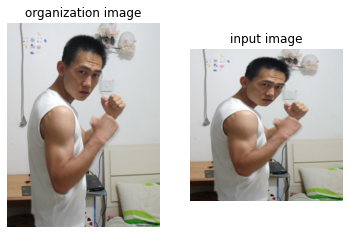

索引： 6 , 年紀： 14


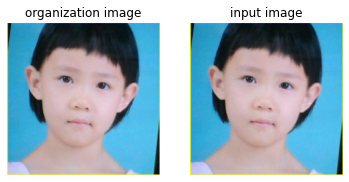

索引： 1 , 年紀： 10


In [2]:
#TH-Hub(MobileNet V2 物件識別, 微調)
#-------------------------------------------------------------------------
import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

def load_sample(sample_dir,shuffleflag = True):
    print ('loading sample  dataset..')
    lfilenames = []
    labelsnames = []
    for (dirpath, dirnames, filenames) in os.walk(sample_dir):#遞歸檢查資料夾
        for filename in filenames:                            #檢查所有檔名
            #print(dirnames)
            filename_path = os.sep.join([dirpath, filename])
            lfilenames.append(filename_path)               #加入檔名
            labelsnames.append( dirpath.split('\\')[-1] )#加入檔名對應的標簽

    lab= list(sorted(set(labelsnames)))  #產生標簽名稱清單
    labdict=dict( zip( lab  ,list(range(len(lab)))  )) #產生字典

    labels = [labdict[i] for i in labelsnames]
    if shuffleflag == True:
        return shuffle(np.asarray( lfilenames),np.asarray( labels)),np.asarray(lab)
    else:
        return (np.asarray( lfilenames),np.asarray( labels)),np.asarray(lab)
    
    
#載入標簽，並產生列表
data_dir = 'TF_Hub_Example\IMBD-WIKI\\'  #定義檔案路徑
_,labels = load_sample(data_dir,False)   #載入檔名稱與標簽
print(labels)#輸出load_sample傳回的標簽字串

#定義待測試圖片路徑
sample_images = [r'.\TF_Hub_Example\22.jpg', r'.\TF_Hub_Example\tt2t.jpg']               


#分類別模型
tf.logging.set_verbosity(tf.logging.ERROR)
tf.reset_default_graph()
thissavedir= r'D:\tmp'
PATH_TO_CKPT = thissavedir +'\output_graph.pb'
od_graph_def = tf.GraphDef()
with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

fenlei_graph = tf.get_default_graph()
height,width = 224,224

#啟動
with tf.Session(graph=fenlei_graph) as sess:
    result = fenlei_graph.get_tensor_by_name('final_result:0')
    input_imgs = fenlei_graph.get_tensor_by_name('Placeholder:0')
    y = tf.argmax(result,axis = 1)

    #定義圖片預先處理函數
    def preimg(img): 
        reimg = np.asarray(img.resize((height, width)),
                          dtype=np.float32).reshape(height, width,3)
        normimg = 2 *( reimg / 255.0)-1.0
        return normimg

    #獲得原始圖片與預先處理圖片
    batchImg = [ preimg( Image.open(imgfilename) ) for imgfilename in sample_images ]
    orgImg = [  Image.open(imgfilename)  for imgfilename in sample_images ]

    yv = sess.run(y, feed_dict={input_imgs: batchImg})
    print(yv)
    print(yv,np.shape(yv))          
    
    #顯示輸出結果
    def showresult(yy,img_norm,img_org):                    
        plt.figure()
        p1 = plt.subplot(121)
        p2 = plt.subplot(122)
        p1.imshow(img_org)# 顯示圖片
        p1.axis('off')
        p1.set_title("organization image")

        img = ((img_norm+1)/2)*255
        p2.imshow(  np.asarray(img,np.uint8))
        p2.axis('off')
        p2.set_title("input image")

        plt.show()

        print("索引：",yy,",","年紀：",labels[yy])

    for yy,img1,img2 in zip(yv,batchImg,orgImg):
        showresult(yy,img1,img2)


# (14) Tensorflow Slim 

In [ ]:
#TF Slim 現有模組(微調)
#---------------------------------------------------------------------------------------------------------

#環境變數
import tensorflow as tf
import os
import sys             
sys.path.append(r"D:\Python\TFslim\models-master\research\slim")
nets_path = r'slim'                             #載入環境變數
if nets_path not in sys.path:
    sys.path.insert(0,nets_path)
else:
    print('already add slim')

# (1) 讀取 Nasnet 資料庫
from nets.nasnet import nasnet                 #匯出nasnet
slim = tf.contrib.slim                         #slim
image_size = nasnet.build_nasnet_mobile.default_image_size  #獲得圖片輸入尺寸 224


# (2) 印出輸入影像 list
from preprocessing import preprocessing_factory#圖形處理
def list_images(directory):

    labels = os.listdir(directory)
    labels.sort()
    files_and_labels = []
    for label in labels:
        for f in os.listdir(os.path.join(directory, label)):
            if 'jpg' in f.lower() or 'png' in f.lower():
                files_and_labels.append((os.path.join(directory, label, f), label))
                
    filenames, labels = zip(*files_and_labels)
    filenames = list(filenames)
    labels = list(labels)
    unique_labels = list(set(labels))

    label_to_int = {}
    for i, label in enumerate(sorted(unique_labels)):
        label_to_int[label] = i+1
    print(label,label_to_int[label])
    
    labels = [label_to_int[l] for l in labels]
    print(labels[:6],labels[-6:])
    return filenames, labels  


# (3) 圖形批次預先處理
num_workers = 2  
def _parse_function(filename, label):  #定義圖形解碼函數
    image_string = tf.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)          
    return image, label

def training_preprocess(image, label):  #定義調整圖形大小函數
    image = image_preprocessing_fn(image, image_size, image_size)
    return image, label

def val_preprocess(image, label):   #定義評估圖形預先處理函數
    image = image_eval_preprocessing_fn(image, image_size, image_size)
    return image, label


# (4) 建立帶批次的資料集
def creat_batched_dataset(filenames, labels,batch_size,isTrain = True):
    
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

    dataset = dataset.map(_parse_function, num_parallel_calls=num_workers)#對圖形解碼
        
    if isTrain == True:
        dataset = dataset.shuffle(buffer_size=len(filenames))#打亂資料順序
        dataset = dataset.map(training_preprocess, num_parallel_calls=num_workers)#調整圖形大小
    else:
        dataset = dataset.map(val_preprocess,num_parallel_calls=num_workers)#調整圖形大小
        
    return dataset.batch(batch_size)   #傳回批次資料

# (5) 根據目錄傳回資料集
def creat_dataset_fromdir(directory,batch_size,isTrain = True):
    filenames, labels = list_images(directory)
    num_classes = len(set(labels))
    print("num_classes",num_classes)
    dataset = creat_batched_dataset(filenames, labels,batch_size,isTrain)
    return dataset,num_classes


# (6) 建立類別

class MyNASNetModel(object):
    """微調模型類別MyNASNetModel"""
    def __init__(self, model_path=''): #原始模型的路徑
        self.model_path = model_path 

    def MyNASNet(self,images,is_training): #獲得模型命名空間
        arg_scope = nasnet.nasnet_mobile_arg_scope()         
        with slim.arg_scope(arg_scope):
            #建構NASNet Mobile模型
            logits, end_points = nasnet.build_nasnet_mobile(images,num_classes = self.num_classes+1,
                                                            is_training=is_training)
        global_step = tf.train.get_or_create_global_step() 
        return logits,end_points,global_step   

    def FineTuneNASNet(self,is_training):       #實現微調模型的網路動作
        model_path = self.model_path
        exclude = ['final_layer','aux_7']  
        variables_to_restore = slim.get_variables_to_restore(exclude=exclude)
        if is_training == True:
            init_fn = slim.assign_from_checkpoint_fn(model_path, variables_to_restore,ignore_missing_vars=True)
        else:
            init_fn = None

        tuning_variables = [] #將沒有還原的超參收集起來，用於微調訓練
        for v in exclude:
            tuning_variables += slim.get_variables(v)
            
        print('final_layer:',slim.get_variables('final_layer'))
        print('aux_7:',slim.get_variables('aux_7'))
        print("tuning_variables:",tuning_variables)
        return init_fn,tuning_variables


    def build_acc_base(self,labels):#定義評估函數
        self.prediction = tf.cast(tf.argmax(self.logits, 1),tf.int32)
        self.correct_prediction = tf.equal(self.prediction, labels)
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction,tf.float32))
        self.accuracy_top_5 = tf.reduce_mean(tf.cast(tf.nn.in_top_k(predictions=self.logits, targets=labels, k=5),tf.float32))

    def load_cpk(self,global_step,sess,begin = 0,saver= None,save_path = None):
        if begin == 0:
            save_path=r'./train_nasnet' 
            if not os.path.exists(save_path):
                print("there is not a model path:",save_path)
            saver = tf.train.Saver(max_to_keep=1)
            return saver,save_path
        else:
            kpt = tf.train.latest_checkpoint(save_path)
            print("load model:",kpt)
            startepo= 0#計步
            if kpt!=None:
                saver.restore(sess, kpt) 
                ind = kpt.find("-")
                startepo = int(kpt[ind+1:])
                print("global_step=",global_step.eval(),startepo)
            return startepo

    def build_model_train(self,images, labels,learning_rate1,learning_rate2,is_training):
        self.logits,self.end_points, self.global_step= self.MyNASNet(images,is_training=is_training)
        self.step_init = self.global_step.initializer
        self.init_fn,self.tuning_variables = self.FineTuneNASNet(is_training=is_training)
        tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=self.logits)
        loss = tf.losses.get_total_loss()
        
        #微調的研讀率
        learning_rate1 = tf.train.exponential_decay(learning_rate=learning_rate1,global_step=self.global_step,decay_steps=100, decay_rate=0.5)
        learning_rate2 = tf.train.exponential_decay(learning_rate=learning_rate2,global_step=self.global_step,decay_steps=100, decay_rate=0.2)

        last_optimizer = tf.train.AdamOptimizer(learning_rate1)
        full_optimizer = tf.train.AdamOptimizer(learning_rate2)

        update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(update_ops):#更新批次歸一化中的參數
            self.last_train_op = last_optimizer.minimize(loss, self.global_step,var_list=self.tuning_variables)
            self.full_train_op = full_optimizer.minimize(loss, self.global_step)

        self.build_acc_base(labels)#定義評估模型關聯指標
        tf.summary.scalar('accuracy', self.accuracy)#寫入日志，支援tensorBoard動作
        tf.summary.scalar('accuracy_top_5', self.accuracy_top_5)

        #將收集的所有預設圖表並合並
        self.merged = tf.summary.merge_all()
        self.train_writer = tf.summary.FileWriter('./log_dir/train')
        self.eval_writer = tf.summary.FileWriter('./log_dir/eval')
        self.saver,self.save_path = self.load_cpk(self.global_step,None)   #定義檢查點關聯變數

    def build_model(self,mode='train',testdata_dir='./data/val',traindata_dir='./data/train', batch_size=32,learning_rate1=0.001,learning_rate2=0.001):

        if mode == 'train':
            tf.reset_default_graph()
            dataset,self.num_classes = creat_dataset_fromdir(traindata_dir,batch_size)
            testdataset,_ = creat_dataset_fromdir(testdata_dir,batch_size,isTrain = False)
            iterator = tf.data.Iterator.from_structure(dataset.output_types, dataset.output_shapes)
            images, labels = iterator.get_next()
            iterator.make_initializer
            self.train_init_op = iterator.make_initializer(dataset)
            self.test_init_op = iterator.make_initializer(testdataset)
            self.build_model_train(images, labels,learning_rate1,learning_rate2,is_training=True)
            self.global_init = tf.global_variables_initializer()
            tf.get_default_graph().finalize()

        elif mode == 'test':
            tf.reset_default_graph()
            testdataset,self.num_classes = creat_dataset_fromdir(testdata_dir,batch_size,isTrain = False)
            iterator = tf.data.Iterator.from_structure(testdataset.output_types, testdataset.output_shapes)
            self.images, labels = iterator.get_next()
            self.test_init_op = iterator.make_initializer(testdataset)
            self.logits,self.end_points, self.global_step= self.MyNASNet(self.images,is_training=False)
            self.saver,self.save_path = self.load_cpk(self.global_step,None)   #定義檢查點關聯變數
            self.build_acc_base(labels)
            tf.get_default_graph().finalize()


        elif mode == 'eval':
            tf.reset_default_graph()
            testdataset,self.num_classes = creat_dataset_fromdir(testdata_dir,batch_size,isTrain = False)
            iterator = tf.data.Iterator.from_structure(testdataset.output_types, testdataset.output_shapes)
            self.images, labels = iterator.get_next()
            self.logits,self.end_points, self.global_step= self.MyNASNet(self.images,is_training=False)
            self.saver,self.save_path = self.load_cpk(self.global_step,None)   #定義檢查點關聯變數
            tf.get_default_graph().finalize()

# (7) 測試
def check_accuracy(sess):
    """測試模型準確率"""
    sess.run(mymode.test_init_op)  #起始化測試資料集
    num_correct, num_samples = 0, 0 #定義正確個數 和 總個數
    i = 0
    while True:
        i+=1
        print('i',i)
        try:
            #計算correct_prediction 取得prediction、labels是否相同 
            correct_pred,accuracy,logits = sess.run([mymode.correct_prediction,mymode.accuracy,mymode.logits])
            #累加correct_pred
            num_correct += correct_pred.sum()
            num_samples += correct_pred.shape[0]
            print("accuracy",accuracy,logits)

        except tf.errors.OutOfRangeError:  #捕捉例外，資料用完自動跳出
            print('over')
            break
    
    acc = float(num_correct) / num_samples #計算並傳回準確率
    return acc 

def check_sex(imgdir,sess):
    img = Image.open(image_dir)                               #讀入圖片
    if "RGB"!=img.mode :                                      #檢查圖片格式
        img = img.convert("RGB") 

    img = np.asarray(img.resize((image_size,image_size)),dtype=np.float32).reshape(1,image_size,image_size,3)
    img = 2 *( img / 255.0)-1.0 

    prediction = sess.run(mymode.logits, {mymode.images: img})#傳入nasnet輸入端中
    print(prediction)
    
    pre = prediction.argmax()#傳回張量中最大值的索引
    print(pre)
    
    if pre == 1: img_id = 'man'
    elif pre == 2: img_id = 'woman'
    else: img_id = 'None'
    plt.imshow( np.asarray((img[0]+1)*255/2,np.uint8 )  )
    plt.show()
    print(img_id,"--",image_dir)#傳回類別別
    return pre


image_preprocessing_fn      = preprocessing_factory.get_preprocessing('nasnet_mobile', is_training=True)
image_eval_preprocessing_fn = preprocessing_factory.get_preprocessing('nasnet_mobile', is_training=False)

#設置數據集
batch_size = 32
train_dir  = r'D:\Python\Tensorflow\TF_Slim_Example\data\train'
val_dir    = r'D:\Python\Tensorflow\TF_Slim_Example\data\val'
test_dir  = r'D:\Python\Tensorflow\TF_Slim_Example\data\val'

#設置學習率
learning_rate1 = 1e-1
learning_rate2 = 1e-3
num_epochs1 = 2   #微調的迭代次數
num_epochs2 = 200   #聯調的迭代次數

#讀取模組、進行微調
mymode = MyNASNetModel(r'D:\Python\Tensorflow\TF_Slim_Example\nasnet-a_mobile_04_10_2017\model.ckpt')  #起始化模型
mymode.build_model('train',val_dir,train_dir,batch_size,learning_rate1 ,learning_rate2 )#將模型定義載入圖中


#進行
with tf.Session() as sess:
    sess.run(mymode.global_init)
    step = 0
    step = mymode.load_cpk(mymode.global_step,sess,1,mymode.saver,mymode.save_path )#載入模型
    print(step)
    
    if step == 0:#微調
        mymode.init_fn(sess)  #載入預先編譯模型權重
        for epoch in range(num_epochs1): 
            print('Starting1 epoch %d / %d' % (epoch + 1, num_epochs1))#輸出進度 
            #用訓練集起始化迭代器
            sess.run(mymode.train_init_op)#資料集從頭開始
            while True:
                try:
                    step += 1
                    #預測，合並圖，訓練
                    acc,accuracy_top_5, summary, _ = sess.run([mymode.accuracy, mymode.accuracy_top_5,mymode.merged,mymode.last_train_op])
                    
                    #mymode.train_writer.add_summary(summary, step)#寫入記錄檔
                    if step % 100 == 0:
                        print(f'step: {step} train1 accuracy: {acc},{accuracy_top_5}')
                except tf.errors.OutOfRangeError:#資料集指標在最後
                    print("train1:",epoch," ok")
                    mymode.saver.save(sess, mymode.save_path+"/mynasnet.cpkt",   global_step=mymode.global_step.eval())
                    break
        sess.run(mymode.step_init)#微調結束，計數器從0開始
    
    #整體訓練
    for epoch in range(num_epochs2):
        print('Starting2 epoch %d / %d' % (epoch + 1, num_epochs2))
        sess.run(mymode.train_init_op)
        while True:
            try:
                step += 1
                #預測，合並圖，訓練
                acc, summary, _ = sess.run([mymode.accuracy, mymode.merged, mymode.full_train_op])
                mymode.train_writer.add_summary(summary, step)#寫入記錄檔
                if step % 100 == 0:
                    print(f'step: {step} train2 accuracy: {acc}')
            except tf.errors.OutOfRangeError:
                print("train2:",epoch," ok")
                mymode.saver.save(sess, mymode.save_path+"/mynasnet.cpkt",   global_step=mymode.global_step.eval())
                break

                
mymode.build_model('test',test_dir )     #將模型定義載入圖中
with tf.Session() as sess:  
    
    mymode.load_cpk(mymode.global_step,sess,1,mymode.saver,mymode.save_path )#載入模型
    val_acc = check_accuracy(sess) #測試模型的準確性
    print('Val accuracy: %f\n' % val_acc)

    #單張圖片測試
    image_dir = r'D:\Python\Tensorflow\TF_Slim_Example\tt2t.jpg'         #選取測試圖片
    check_sex(image_dir,sess)
    
    image_dir = test_dir + '\\woman' + '\\000001.jpg'         #選取測試圖片
    check_sex(image_dir,sess)
    
    image_dir = test_dir + '\\man' + '\\000003.jpg'         #選取測試圖片
    check_sex(image_dir,sess)

    

already add slim
woman 2
[1, 1, 1, 1, 1, 1] [2, 2, 2, 2, 2, 2]
num_classes 2
woman 2
[1, 1, 1, 1, 1, 1] [2, 2, 2, 2, 2, 2]
num_classes 2


final_layer: [<tf.Variable 'final_layer/fully_connected/weights:0' shape=(1056, 3) dtype=float32_ref>, <tf.Variable 'final_layer/fully_connected/biases:0' shape=(3,) dtype=float32_ref>]
aux_7: [<tf.Variable 'aux_7/aux_logits/proj/weights:0' shape=(1, 1, 528, 128) dtype=float32_ref>, <tf.Variable 'aux_7/aux_logits/proj/biases:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'aux_7/aux_logits/aux_bn0/beta:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'aux_7/aux_logits/aux_bn0/moving_mean:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'aux_7/aux_logits/aux_bn0/moving_variance:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'aux_7/aux_logits/Conv/weights:0' shape=(4, 4, 128, 768) dtype=float32_ref>, <tf.Variable 'aux_7/aux_logits/Conv/biases:0' shape=(768,) dtype=float32_ref>, <tf.Variable 'aux_7/aux_logits/aux_bn1/beta:0' shape=(768,) dtype=float32_ref>, <tf.Variable 'aux_7/aux_logits/aux_bn1/moving_mean:0' shape=(768,) dtype=float32_ref>, <tf.Variable 'aux_7/aux_logits/aux_bn1/movi

woman 2
[1, 1, 1, 1, 1, 1] [2, 2, 2, 2, 2, 2]
num_classes 2
load model: ./train_nasnet\mynasnet.cpkt-2500
INFO:tensorflow:Restoring parameters from ./train_nasnet\mynasnet.cpkt-2500
global_step= 2500 2500
i 1
accuracy 0.0 [[0.         1.8388113  2.8783386 ]
 [0.         1.4769751  2.2003095 ]
 [0.         1.2903165  1.916048  ]
 [0.         1.6749994  2.5855806 ]
 [0.         1.5589926  2.3496282 ]
 [0.         1.7348342  2.6635766 ]
 [0.         1.4668677  2.2165942 ]
 [0.         1.6549854  2.5273373 ]
 [0.         1.7652365  2.7163668 ]
 [0.         0.78316885 1.0829974 ]
 [0.         1.731402   2.6882463 ]
 [0.         1.8385773  2.8812602 ]
 [0.         1.5012014  2.2367995 ]
 [0.         1.0549848  1.4848604 ]
 [0.         1.8043298  2.8218246 ]
 [0.         1.427628   2.130956  ]
 [0.         1.5245546  2.3188355 ]
 [0.         1.4108745  2.114279  ]
 [0.         1.7403902  2.6992478 ]
 [0.         1.8274919  2.851565  ]
 [0.         1.7997131  2.797771  ]
 [0.         1.7679793

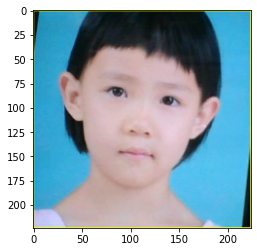

woman -- D:\Python\Tensorflow\TF_Slim_Example\tt2t.jpg
[[0.         0.86150044 1.2061568 ]]
2


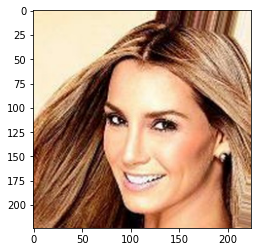

woman -- D:\Python\Tensorflow\TF_Slim_Example\data\val\woman\000001.jpg
[[0.        1.8271612 2.8571606]]
2


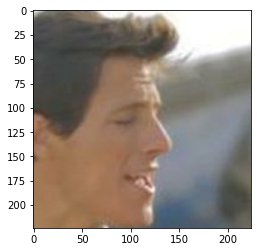

woman -- D:\Python\Tensorflow\TF_Slim_Example\data\val\man\000003.jpg


In [5]:
mymode.build_model('test',test_dir )     #將模型定義載入圖中
with tf.Session() as sess:  
    
    mymode.load_cpk(mymode.global_step,sess,1,mymode.saver,mymode.save_path )#載入模型
    val_acc = check_accuracy(sess) #測試模型的準確性
    print('Val accuracy: %f\n' % val_acc)

    #單張圖片測試
    image_dir = r'D:\Python\Tensorflow\TF_Slim_Example\tt2t.jpg'         #選取測試圖片
    check_sex(image_dir,sess)
    
    image_dir = test_dir + '\\woman' + '\\000001.jpg'         #選取測試圖片
    check_sex(image_dir,sess)
    
    image_dir = test_dir + '\\man' + '\\000003.jpg'         #選取測試圖片
    check_sex(image_dir,sess)


In [ ]:
#https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/357392/

#簡書-Good
#https://www.jianshu.com/p/9f5e2e2a45b4
#TF Slim 現有模組
#---------------------------------------------------------------------------------------------------------
import tensorflow as tf
import os
import sys             
sys.path.append(r"D:\Python\TFslim\models-master\research\slim")

nets_path = r'./slim'
if nets_path not in sys.path:
    sys.path.insert(0,nets_path)
else:
    print('already add slim')
    
from PIL import Image
from matplotlib import pyplot as plt
from nets.nasnet import pnasnet
import numpy as np
from datasets import imagenet

def getone(onestr):
    return onestr.replace(',',' ')

def showresult(yy,img_norm,img_org):                    #定義顯示圖片函數
    plt.figure()
    p1 = plt.subplot(121)
    p2 = plt.subplot(122)
    p1.imshow(img_org)# 顯示圖片
    p1.axis('off')
    p1.set_title("organization image")
    #顯示圖片
    p2.imshow((img_norm * 255).astype(np.uint8))
    p2.axis('off')
    p2.set_title("input image")
    plt.show()
    print(yy,labels[yy])
    
def preimg(img):                                    #定義圖片預先處理函數
    imgnp = np.asarray(img.resize((image_size,image_size)), dtype=np.float32).reshape(image_size,image_size,3)
    return imgnp[:,:,:3]

with open(r'TF_Slim_Example\中文標籤_1000.csv','r+',encoding="utf-8") as f: 
    labels =list( map(getone,list(f))  )
    print(len(labels),type(labels),labels[:5])

#初始化
slim = tf.contrib.slim 
tf.reset_default_graph() #重置 Rest Graph

#設置輸入
image_size = pnasnet.build_pnasnet_large.default_image_size
sample_images = [r'D:\Python\Tensorflow\TF_Slim_Example\hy.jpg']               #定義待測試圖片路徑
#sample_images = [r'D:\Python\Tensorflow\TF_Slim_Example\hy.jpg', r'D:\Python\Tensorflow\TF_Slim_Example\ps.jpg',r'D:\Python\Tensorflow\TF_Slim_Example\72.jpg']               #定義待測試圖片路徑
input_imgs = tf.placeholder(tf.float32, [None, image_size,image_size,3]) #定義占位符
x1 = 2 *( input_imgs / 255.0)-1.0  

#模組
checkpoint_file =r'D:\Python\Tensorflow\TF_Slim_Example\pnasnet-5_large_2017_12_13'   #定義模型路徑
arg_scope = pnasnet.pnasnet_large_arg_scope()              #獲得模型命名空間
#with slim.arg_scope([slim.conv2d, slim.batch_norm, slim.fully_connected, slim.separable_conv2d],reuse=True):
#with slim.arg_scope(arg_scope):
logits, end_points = pnasnet.build_pnasnet_large(x1,num_classes = 1000, is_training=False)
prob = end_points['Predictions']
y = tf.argmax(prob,axis = 1)   #獲得結果的輸出節點
    
variables_to_restore = slim.get_variables_to_restore()
init_fn = slim.assign_from_checkpoint_fn(checkpoint_file, variables_to_restore,ignore_missing_vars=True)
#kpt = tf.train.latest_checkpoint(checkpoint_file)    
    
#開始測試
saver = tf.train.Saver()                                #定義saver，用於載入模型
with tf.Session() as sess:                              #建立階段
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, kpt)
    #sess.run(tf.tables_initializer())
    init_fn(sess)
    
    batchImg = [ preimg( Image.open(imgfilename)) for imgfilename in sample_images ]#獲得原始圖片與預先處理圖片
    orgImg = [  Image.open(imgfilename)  for imgfilename in sample_images ]
    for imgfilename in sample_images:print(imgfilename)
    yv,img_norm = sess.run([y,x1], feed_dict={input_imgs: batchImg})    #輸入到模型
    #reimg, seg, np_image = sess.run([image, pred, processed_image])
    print(yv,np.shape(yv))                                              #顯示輸出結果
    for yy,img1,img2 in zip(yv,batchImg,orgImg):            #顯示每條結果及圖片
        showresult(yy,img1,img2)
#https://www.twblogs.net/a/5b8768462b71775d1cd6f6c8



1001 <class 'list'> ['\ufeff背景known   \n', '丁鲷     \n', '金鱼     \n', '大白鲨     \n', '虎鲨     \n']
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `layer.__call__` method instead.


In [8]:
#查看 cpkt 
#https://blog.csdn.net/u014061630/article/details/80461044
from tensorflow.python import pywrap_tensorflow
checkpoint_file =r'D:\Python\Tensorflow\TF_Slim_Example\pnasnet-5_large_2017_12_13\model.ckpt'   #定義模型路徑
reader = pywrap_tensorflow.NewCheckpointReader(checkpoint_file) #tf.train.NewCheckpointReader
var_to_shape_map = reader.get_variable_to_shape_map()
for key in var_to_shape_map:
    print("tensor_name: ", key)
    #print(reader.get_tensor(key))

tensor_name:  cell_3/comb_iter_3/left/bn_sep_3x3_2/beta/ExponentialMovingAverage
tensor_name:  cell_4/comb_iter_1/left/bn_sep_7x7_1/moving_mean/ExponentialMovingAverage
tensor_name:  aux_7/aux_logits/Conv/BatchNorm/beta
tensor_name:  cell_5/comb_iter_1/left/bn_sep_7x7_2/moving_variance/ExponentialMovingAverage
tensor_name:  cell_0/comb_iter_0/left/separable_5x5_1/pointwise_weights
tensor_name:  cell_1/comb_iter_0/left/bn_sep_5x5_1/moving_variance
tensor_name:  cell_11/comb_iter_2/right/bn_sep_3x3_1/moving_variance
tensor_name:  aux_7/aux_logits/Conv/BatchNorm/beta/ExponentialMovingAverage
tensor_name:  cell_0/comb_iter_0/left/separable_5x5_1/pointwise_weights/ExponentialMovingAverage
tensor_name:  cell_2/comb_iter_2/right/bn_sep_3x3_2/beta/ExponentialMovingAverage
tensor_name:  cell_0/beginning_bn/gamma
tensor_name:  cell_stem_1/comb_iter_2/left/bn_sep_5x5_2/moving_mean/ExponentialMovingAverage
tensor_name:  cell_stem_1/comb_iter_1/left/separable_7x7_1/pointwise_weights/ExponentialMovi

tensor_name:  cell_4/comb_iter_2/right/separable_3x3_2/depthwise_weights/ExponentialMovingAverage
tensor_name:  cell_10/comb_iter_0/left/bn_sep_5x5_2/gamma
tensor_name:  cell_1/comb_iter_0/left/separable_5x5_2/depthwise_weights
tensor_name:  cell_2/comb_iter_2/right/bn_sep_3x3_2/moving_variance
tensor_name:  cell_10/comb_iter_0/left/bn_sep_5x5_2/gamma/ExponentialMovingAverage
tensor_name:  cell_1/comb_iter_0/left/separable_5x5_2/depthwise_weights/ExponentialMovingAverage
tensor_name:  cell_3/comb_iter_2/right/separable_3x3_2/pointwise_weights/ExponentialMovingAverage
tensor_name:  cell_stem_1/comb_iter_0/left/bn_sep_5x5_1/moving_variance/ExponentialMovingAverage
tensor_name:  cell_1/comb_iter_1/left/bn_sep_7x7_1/beta
tensor_name:  cell_stem_0/comb_iter_4/left/bn_sep_3x3_2/beta
tensor_name:  cell_1/comb_iter_1/left/bn_sep_7x7_1/beta/ExponentialMovingAverage
tensor_name:  cell_10/comb_iter_1/left/bn_sep_7x7_2/moving_mean
tensor_name:  cell_stem_1/comb_iter_3/left/separable_3x3_1/depthwis

tensor_name:  cell_11/comb_iter_4/left/separable_3x3_2/depthwise_weights/ExponentialMovingAverage
tensor_name:  cell_6/prev_1x1/weights
tensor_name:  cell_11/comb_iter_4/left/separable_3x3_2/pointwise_weights
tensor_name:  cell_6/prev_1x1/weights/ExponentialMovingAverage
tensor_name:  cell_4/comb_iter_0/left/bn_sep_5x5_1/beta
tensor_name:  cell_11/comb_iter_4/left/separable_3x3_2/pointwise_weights/ExponentialMovingAverage
tensor_name:  cell_5/comb_iter_1/left/bn_sep_7x7_1/moving_mean
tensor_name:  cell_2/beginning_bn/beta
tensor_name:  cell_11/prev_bn/beta
tensor_name:  cell_2/beginning_bn/beta/ExponentialMovingAverage
tensor_name:  cell_11/prev_bn/beta/ExponentialMovingAverage
tensor_name:  cell_3/comb_iter_4/left/separable_3x3_1/pointwise_weights/ExponentialMovingAverage
tensor_name:  cell_11/prev_bn/moving_variance
tensor_name:  cell_3/comb_iter_0/left/bn_sep_5x5_2/moving_mean
tensor_name:  cell_2/beginning_bn/moving_variance
tensor_name:  cell_8/comb_iter_0/left/bn_sep_5x5_2/beta/E

tensor_name:  cell_6/comb_iter_0/left/separable_5x5_2/depthwise_weights
tensor_name:  cell_6/comb_iter_0/left/separable_5x5_2/depthwise_weights/ExponentialMovingAverage
tensor_name:  cell_6/comb_iter_1/left/bn_sep_7x7_1/beta
tensor_name:  cell_6/comb_iter_1/left/bn_sep_7x7_1/beta/ExponentialMovingAverage
tensor_name:  cell_6/comb_iter_1/left/bn_sep_7x7_1/moving_mean
tensor_name:  cell_8/comb_iter_2/left/bn_sep_5x5_2/beta
tensor_name:  cell_7/comb_iter_1/left/bn_sep_7x7_1/moving_mean/ExponentialMovingAverage
tensor_name:  cell_6/comb_iter_1/left/bn_sep_7x7_1/moving_variance
tensor_name:  cell_6/comb_iter_1/left/bn_sep_7x7_2/beta
tensor_name:  cell_6/comb_iter_1/left/bn_sep_7x7_2/beta/ExponentialMovingAverage
tensor_name:  cell_6/comb_iter_1/left/bn_sep_7x7_2/moving_variance/ExponentialMovingAverage
tensor_name:  cell_8/comb_iter_2/right/bn_sep_3x3_1/gamma/ExponentialMovingAverage
tensor_name:  cell_stem_1/comb_iter_0/left/bn_sep_5x5_1/moving_mean
tensor_name:  cell_9/comb_iter_3/left/bn

In [2]:
import tensorflow as tf
import pprint
checkpoint_file =r'D:\Python\Tensorflow\TF_Slim_Example\pnasnet-5_large_2017_12_13\model.ckpt'  
NewCheck =tf.train.NewCheckpointReader(checkpoint_file)
print("debug_string:\n"); pprint.pprint(NewCheck.debug_string().decode("utf-8"))

debug_string:

('aux_7/aux_logits/Conv/BatchNorm/beta (DT_FLOAT) [768]\n'
 'aux_7/aux_logits/Conv/BatchNorm/beta/ExponentialMovingAverage (DT_FLOAT) '
 '[768]\n'
 'aux_7/aux_logits/Conv/BatchNorm/gamma (DT_FLOAT) [768]\n'
 'aux_7/aux_logits/Conv/BatchNorm/gamma/ExponentialMovingAverage (DT_FLOAT) '
 '[768]\n'
 'aux_7/aux_logits/Conv/BatchNorm/moving_mean (DT_FLOAT) [768]\n'
 'aux_7/aux_logits/Conv/BatchNorm/moving_mean/ExponentialMovingAverage '
 '(DT_FLOAT) [768]\n'
 'aux_7/aux_logits/Conv/BatchNorm/moving_variance (DT_FLOAT) [768]\n'
 'aux_7/aux_logits/Conv/BatchNorm/moving_variance/ExponentialMovingAverage '
 '(DT_FLOAT) [768]\n'
 'aux_7/aux_logits/Conv/weights (DT_FLOAT) [6,6,128,768]\n'
 'aux_7/aux_logits/Conv/weights/ExponentialMovingAverage (DT_FLOAT) '
 '[6,6,128,768]\n'
 'aux_7/aux_logits/FC/biases (DT_FLOAT) [1001]\n'
 'aux_7/aux_logits/FC/biases/ExponentialMovingAverage (DT_FLOAT) [1001]\n'
 'aux_7/aux_logits/FC/weights (DT_FLOAT) [768,1001]\n'
 'aux_7/aux_logits/FC/weights/

 '(DT_FLOAT) [216]\n'
 'cell_3/comb_iter_3/left/bn_sep_3x3_2/moving_mean (DT_FLOAT) [216]\n'
 'cell_3/comb_iter_3/left/bn_sep_3x3_2/moving_mean/ExponentialMovingAverage '
 '(DT_FLOAT) [216]\n'
 'cell_3/comb_iter_3/left/bn_sep_3x3_2/moving_variance (DT_FLOAT) [216]\n'
 'cell_3/comb_iter_3/left/bn_sep_3x3_2/moving_variance/ExponentialMovingAverage '
 '(DT_FLOAT) [216]\n'
 'cell_3/comb_iter_3/left/separable_3x3_1/depthwise_weights (DT_FLOAT) '
 '[3,3,216,1]\n'
 'cell_3/comb_iter_3/left/separable_3x3_1/depthwise_weights/ExponentialMovingAverage '
 '(DT_FLOAT) [3,3,216,1]\n'
 'cell_3/comb_iter_3/left/separable_3x3_1/pointwise_weights (DT_FLOAT) '
 '[1,1,216,216]\n'
 'cell_3/comb_iter_3/left/separable_3x3_1/pointwise_weights/ExponentialMovingAverage '
 '(DT_FLOAT) [1,1,216,216]\n'
 'cell_3/comb_iter_3/left/separable_3x3_2/depthwise_weights (DT_FLOAT) '
 '[3,3,216,1]\n'
 'cell_3/comb_iter_3/left/separable_3x3_2/depthwise_weights/ExponentialMovingAverage '
 '(DT_FLOAT) [3,3,216,1]\n'
 'cell_3/

 '(DT_FLOAT) [108]\n'
 'cell_stem_1/comb_iter_0/left/separable_5x5_1/depthwise_weights (DT_FLOAT) '
 '[5,5,108,1]\n'
 'cell_stem_1/comb_iter_0/left/separable_5x5_1/depthwise_weights/ExponentialMovingAverage '
 '(DT_FLOAT) [5,5,108,1]\n'
 'cell_stem_1/comb_iter_0/left/separable_5x5_1/pointwise_weights (DT_FLOAT) '
 '[1,1,108,108]\n'
 'cell_stem_1/comb_iter_0/left/separable_5x5_1/pointwise_weights/ExponentialMovingAverage '
 '(DT_FLOAT) [1,1,108,108]\n'
 'cell_stem_1/comb_iter_0/left/separable_5x5_2/depthwise_weights (DT_FLOAT) '
 '[5,5,108,1]\n'
 'cell_stem_1/comb_iter_0/left/separable_5x5_2/depthwise_weights/ExponentialMovingAverage '
 '(DT_FLOAT) [5,5,108,1]\n'
 'cell_stem_1/comb_iter_0/left/separable_5x5_2/pointwise_weights (DT_FLOAT) '
 '[1,1,108,108]\n'
 'cell_stem_1/comb_iter_0/left/separable_5x5_2/pointwise_weights/ExponentialMovingAverage '
 '(DT_FLOAT) [1,1,108,108]\n'
 'cell_stem_1/comb_iter_1/left/bn_sep_7x7_1/beta (DT_FLOAT) [108]\n'
 'cell_stem_1/comb_iter_1/left/bn_sep_7x7

# (15) Tensoflow WIDE DEEP

In [39]:
#使用 WIDE DEEP 模型 建立 人口分布
#Data : adult.data & adult.test
#參考論文 : https://arxiv.org/pdf/1606.07792.pdf
#include
import argparse
import os
import shutil
import sys ; sys.path.append(r"D:\Python\Tensorflow\TF_WideDeep")
import tensorflow as tf       
from utils import parsers,hooks_helper,model_helpers  #引入utils頭檔案

#define columns 
#定義 CVS列名
_CSV_COLUMNS = [                                
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'gender',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_area',
    'income_bracket'
]

#定義每一列的預設值 ( 連續資列為０ / 離散為空值)
_CSV_COLUMN_DEFAULTS = [ [0], [''], [0], [''], [0], [''], [''], [''], [''], [''],[0], [0], [0], [''], ['']]

#定義樣本集的數量
_NUM_EXAMPLES = { 'train': 32561, 'validation': 16281 }

#定義模型的前綴
LOSS_PREFIX = {'wide': 'linear/', 'deep': 'dnn/'}


#建立特徵列(Wide & Deep)
def build_model_columns():
    """產生wide和deep模型的特征列集合."""
    
    #建立特徵列(連續)
    age = tf.feature_column.numeric_column('age')
    education_num = tf.feature_column.numeric_column('education_num')
    capital_gain = tf.feature_column.numeric_column('capital_gain')
    capital_loss = tf.feature_column.numeric_column('capital_loss')
    hours_per_week = tf.feature_column.numeric_column('hours_per_week')
    
    #建立特徵列(離散)
    education = tf.feature_column.categorical_column_with_vocabulary_list(
        'education', ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college','Assoc-acdm', 'Assoc-voc', 
                      '7th-8th', 'Doctorate', 'Prof-school','5th-6th', '10th', '1st-4th', 'Preschool', '12th'])
    
    marital_status = tf.feature_column.categorical_column_with_vocabulary_list('marital_status', ['Married-civ-spouse', 
                    'Divorced', 'Married-spouse-absent','Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'])
    
    relationship = tf.feature_column.categorical_column_with_vocabulary_list('relationship', 
                    ['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried','Other-relative'])
    
    workclass = tf.feature_column.categorical_column_with_vocabulary_list('workclass', 
        ['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov','Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'])

    #將所有職業名稱透過hash算法，離散成1000個類別別:
    occupation = tf.feature_column.categorical_column_with_hash_bucket('occupation', hash_bucket_size=1000)
    
    #將連續值特征列轉為離散值特征.
    age_buckets = tf.feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

    #------------------------------- for wide model --------------------------------
    #定義基礎特征列.
    base_columns = [education, marital_status, relationship, workclass, occupation,age_buckets,]
    
    #定義交叉特征列.
    crossed_columns = [
      tf.feature_column.crossed_column(['education', 'occupation'], hash_bucket_size=1000),
      tf.feature_column.crossed_column([age_buckets, 'education', 'occupation'], hash_bucket_size=1000),]

    #定義wide模型的特征列.(離散)
    wide_columns = base_columns + crossed_columns

    #------------------------------- for deep model --------------------------------
    #定義deep模型的特征列.(連續)
    deep_columns = [
      age,
      education_num,
      capital_gain,
      capital_loss,
      hours_per_week,
      tf.feature_column.indicator_column(workclass),              #將workclass列的稀疏矩陣轉成0ne_hot解碼
      tf.feature_column.indicator_column(education),
      tf.feature_column.indicator_column(marital_status),
      tf.feature_column.indicator_column(relationship),
      tf.feature_column.embedding_column(occupation, dimension=8),#將1000個hash後的類別別，每個用內嵌詞embedding轉換
    ]

    return wide_columns, deep_columns


#建立估算器
def build_estimator(model_dir, model_type,warm_start_from=None):
    """按照特殊的模型產生估算器物件."""
    wide_columns, deep_columns = build_model_columns()
    hidden_units = [100, 75, 50, 25] #for deep
    
    run_config = tf.estimator.RunConfig().replace(                #將GPU個數設為0，關閉GPU運算。因為該模型在CPU上速度更快
      session_config=tf.ConfigProto(device_count={'GPU': 0}),
      save_checkpoints_steps=1000)

    if model_type == 'wide':                                     
        #產生帶有wide模型的估算器物件
        return tf.estimator.LinearClassifier(model_dir=model_dir,feature_columns=wide_columns,config=run_config)
    
    elif model_type == 'deep':     
        #產生帶有deep模型的估算器物件
        return tf.estimator.DNNClassifier(model_dir=model_dir,feature_columns=deep_columns,hidden_units=hidden_units,config=run_config)
    
    else:
        return tf.estimator.DNNLinearCombinedClassifier( 
            model_dir=model_dir,
            linear_feature_columns=wide_columns,
            dnn_feature_columns=deep_columns,
            dnn_hidden_units=hidden_units,
            config=run_config,
            warm_start_from=warm_start_from)


#定義輸入檔案與批量次數
def input_fn(data_file, num_epochs, shuffle, batch_size):       #定義估算器輸入函數
    """估算器的輸入函數."""
    assert tf.gfile.Exists(data_file), (                          #用斷言敘述判斷樣本檔案是否存在
      '%s not found. Please make sure you have run data_download.py and '
      'set the --data_dir argument to the correct path.' % data_file)

    def parse_csv(value):
        print('Parsing', data_file)
        columns = tf.decode_csv(value, record_defaults=_CSV_COLUMN_DEFAULTS)
        features = dict(zip(_CSV_COLUMNS, columns))
        labels = features.pop('income_bracket')
        return features, tf.equal(labels, '>50K')

    #建立dataset資料集 並依序處理
    dataset = tf.data.TextLineDataset(data_file)                  
    
    if shuffle:                                                   #對資料進行亂序動作
        dataset = dataset.shuffle(buffer_size=_NUM_EXAMPLES['train'])
    
    dataset = dataset.map(parse_csv, num_parallel_calls=5)        #對data_file檔案中的每行資料，進行特征抽取，傳回新的資料集
    dataset = dataset.repeat(num_epochs)                          #將資料集重復num_epochs次
    dataset = dataset.batch(batch_size)                           #將資料集按照batch_size劃分
    dataset = dataset.prefetch(1)
    return dataset    
    
    
#匯出模型
def export_model(model, model_type, export_dir):                #定義函數export_model ，用於匯出模型
    """匯出模型.
        參數:
            model: 估算器物件
            model_type: 要匯出的模型型態，可選值有 "wide"、 "deep" 或 "wide_deep"
            export_dir: 匯出模型的路徑.
    """
    wide_columns, deep_columns = build_model_columns()        #獲得列張量
    if model_type == 'wide':
        columns = wide_columns
    elif model_type == 'deep':
        columns = deep_columns
    else:
        columns = wide_columns + deep_columns
    
    feature_spec = tf.feature_column.make_parse_example_spec(columns) #建立特徵字典
    example_input_fn = (tf.estimator.export.build_parsing_serving_input_receiver_fn(feature_spec))
    model.export_savedmodel(export_dir, example_input_fn) #將訓練好的模型導出 (輸出目錄, 接收數據函數)
    
    
#定義參數解析    
class WideDeepArgParser(argparse.ArgumentParser):               #定義WideDeepArgParser類別，用於解析參數
    """該類別用於在程式啟動時的參數解析."""
    def __init__(self):                                           #起始化函數
        super(WideDeepArgParser, self).__init__(parents=[parsers.BaseParser()]) #呼叫父類別的起始化函數
        self.add_argument('--model_type', '-mt', type=str, default='wide_deep',   #加入一個啟動參數--model_type，預設值為wide_deep
                            choices=['wide', 'deep', 'wide_deep'],                  #定義該參數的可選值
                            help='[default %(default)s] Valid model types: wide, deep, wide_deep.', #定義啟動參數的幫助指令
                            metavar='<MT>')
        
        self.set_defaults(                                          #為其他參數設定預設值
            data_dir='income_data',                                 #設定資料樣本路徑
            model_dir='income_model',                               #設定模型存放路徑
            export_dir='income_model_exp',                          #設定匯出模型存放路徑
            train_epochs=5,                                        #設定迭代次數
            batch_size=40)                                          #設定批次大小

    
#訓練
def trainmain(argv):
    parser = WideDeepArgParser()                                  #案例化WideDeepArgParser，用於解析啟動參數
    flags = parser.parse_args(args=argv[1:])                      #獲得解析後的參數flags
    print("解析的參數為：",flags)
    shutil.rmtree(flags.model_dir, ignore_errors=True)            #若果模型存在，整個目錄移除
    model = build_estimator(flags.model_dir, flags.model_type)    #產生估算器物件

    train_file = os.path.join(flags.data_dir, r"D:\Python\Tensorflow\TF_WideDeep\adult.data.csv")   #獲得訓練集樣本檔案的路徑
    test_file = os.path.join(flags.data_dir,  r"D:\Python\Tensorflow\TF_WideDeep\adult.test.csv")    #獲得測試集樣本檔案的路徑


    def train_input_fn():                                         #定義訓練集樣本輸入函數
        return input_fn(                                            #該輸入函數按照batch_size批次,迭代輸入epochs_between_evals次，使用亂序處理
                train_file, flags.epochs_between_evals, True, flags.batch_size)

    def eval_input_fn():                                          #定義測試集樣本輸入函數
        return input_fn(test_file, 1, False, flags.batch_size)    #該輸入函數按照batch_size批次,迭代輸入1次，不使用亂序處理

    loss_prefix = LOSS_PREFIX.get(flags.model_type, '')           #格式化輸出loss的前綴

    train_hook = hooks_helper.get_logging_tensor_hook(            #定義訓練鉤子，獲得訓練過程中的狀態
        batch_size=flags.batch_size,
        tensors_to_log={'average_loss': loss_prefix + 'head/truediv','loss': loss_prefix + 'head/weighted_loss/Sum'})
    
    
    for n in range(flags.train_epochs ): #將總迭代數，按照epochs_between_evals分段。並循環對每段進行訓練
        model.train(input_fn=train_input_fn, hooks=[train_hook])   #呼叫估算器的train方法進行訓練
        results = model.evaluate(input_fn=eval_input_fn)           #呼叫估算器的evaluate方法進行評估計算

    print('{0:-^60}'.format('evaluate at epoch %d'%( (n + 1))))#分隔符

    for key in sorted(results):                                    #顯示評估結果
        print('%s: %s' % (key, results[key]))
        if model_helpers.past_stop_threshold(flags.stop_threshold, results['accuracy']):
            break

    if flags.export_dir is not None:                               #根據設定匯出凍結圖模型，用於tfseving
        export_model(model, flags.model_type, flags.export_dir)
       
    
#測試  
def premain(argv):
    parser = WideDeepArgParser()                                  #案例化WideDeepArgParser，用於解析啟動參數
    flags = parser.parse_args(args=argv[1:])                      #獲得解析後的參數flags
    print("解析的參數為：",flags)

    test_file = os.path.join(flags.data_dir,  r"D:\Python\Tensorflow\TF_WideDeep\adult.test.csv")        #獲得測試集樣本檔案的路徑

    def eval_input_fn():                                          #定義測試集樣本輸入函數
        return input_fn(test_file, 1, False, flags.batch_size)      #該輸入函數按照batch_size批次,迭代輸入1次，不使用亂序處理

    # model2 = build_estimator('./temp', flags.model_type,flags.model_dir)#也可以使用熱啟動的模式
    model2 = build_estimator(flags.model_dir, flags.model_type)

    predictions = model2.predict(input_fn=eval_input_fn)
    for i, per in enumerate(predictions):
        print("csv中第",i,"條結果為：",per['class_ids'])
        if i==5:
            break
            
#主程式段落
if __name__ == '__main__':                  #當執行檔案時，模組名字__name__就會為__main__
    tf.logging.set_verbosity(tf.logging.ERROR) #設定log等級為INFO，若果想要顯示的訊息少點，可以設定成 WARN
    trainmain(argv=sys.argv)                       #呼叫main函數，進入程式主體
    premain(argv=sys.argv)

usage: ipykernel_launcher.py [-h] [--data_dir <DD>] [--model_dir <MD>]
                             [--train_epochs <TE>]
                             [--epochs_between_evals <EBE>]
                             [--stop_threshold <ST>] [--batch_size <BS>]
                             [--multi_gpu] [--export_dir <ED>]
                             [--model_type <MT>]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\fre5x\AppData\Roaming\jupyter\runtime\kernel-d01ed298-fbf4-4816-91b5-2aa4e5637535.json


SystemExit: 2

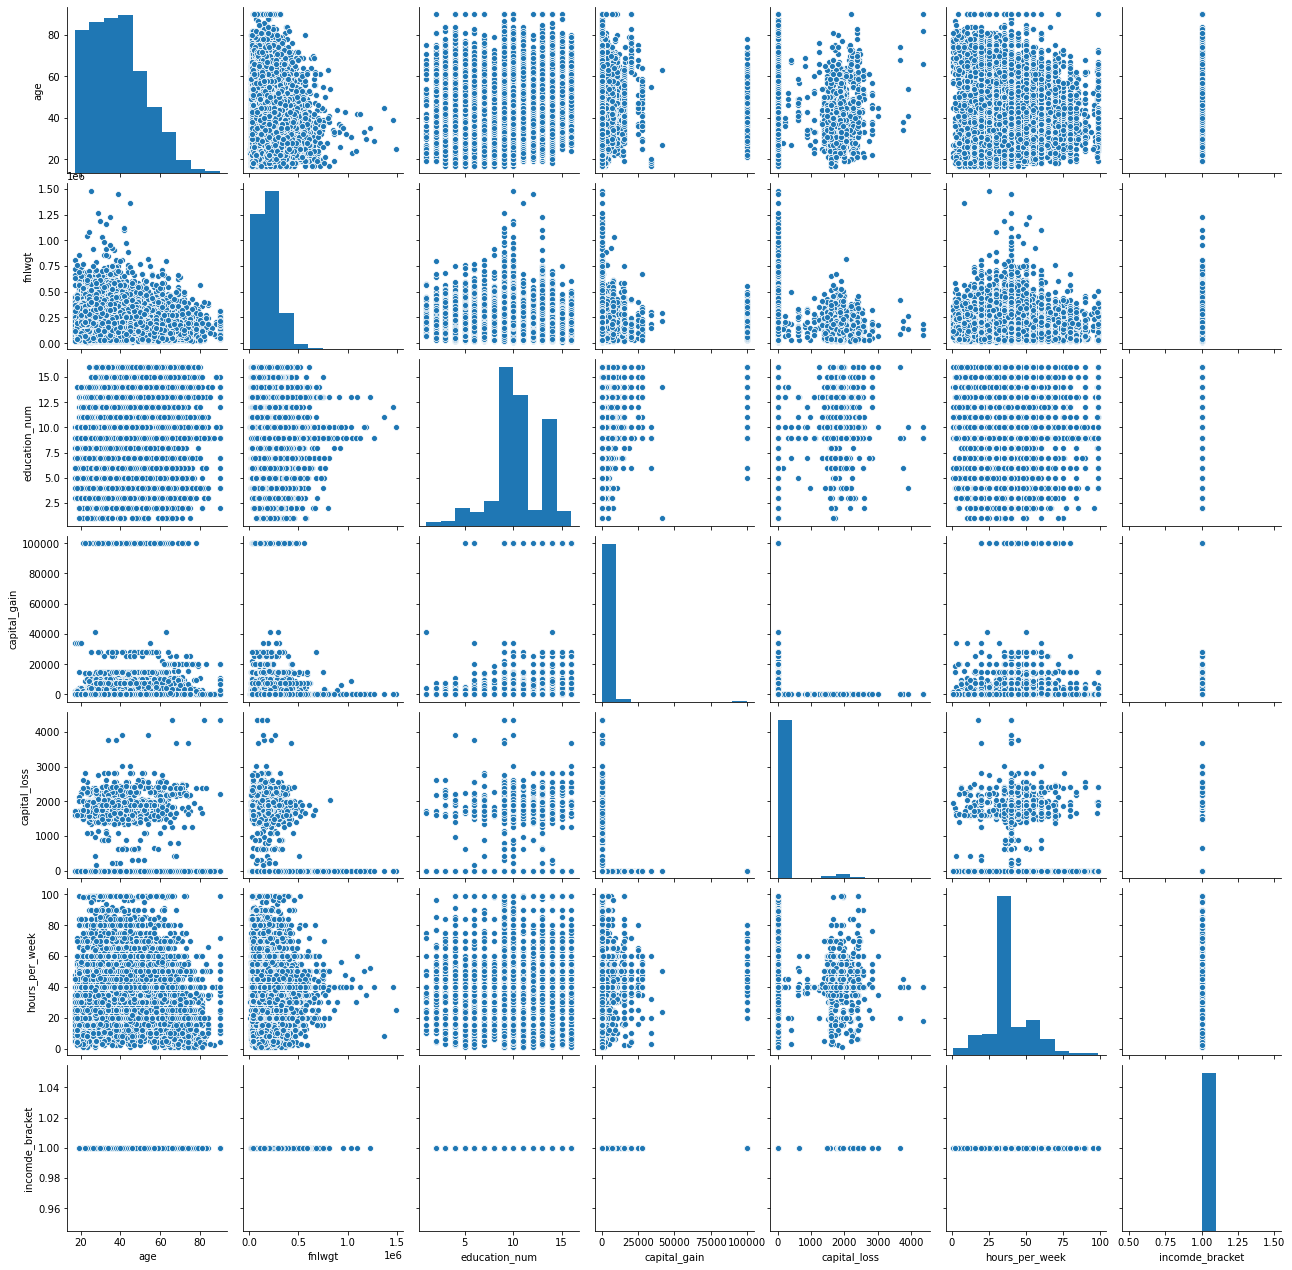

In [50]:
#seaborn
#https://seaborn.pydata.org
#https://github.com/Willkoehresn/Data-Analysis/blob/master/pairplots/Pair%20Plots.ipynb
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter(action="ignore", category=RuntimeWarning) #遇到空值 忽略警告

_CSV_COLUMNS = [                                
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'gender',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_area',
    'income_bracket'
]

evaldata = r"D:\Python\Tensorflow\TF_WideDeep\income_data\adult.data.csv"
df = pd.read_csv(evaldata, names=_CSV_COLUMNS, skiprows=0, encoding="ISO-8859-1")#skiprows=1, columns=list('ABCD')
df.loc[df['income_bracket']=='<50K','incomde_bracket']=0
df.loc[df['income_bracket']=='>50K','incomde_bracket']=1
df_real = df.dropna(how='all',axis=1)
sns.pairplot(df_real)

In [54]:
#feature colum
import tensorflow as tf
price = tf.feature_column.numeric_column('price')
features = {'price':[[1.],[5.]]}
net = tf.feature_column.input_layer(features,[price])

with tf.Session() as sess:
    tt=sess.run(net)
    print(tt)

[[1.]
 [5.]]
